In [1011]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#load dataset
df = pd.read_csv('loan.csv')
df.head()

/var/folders/ws/t318bm0j4md5pdkww376lp5m0000gq/T/ipykernel_65981/2219530974.py:7: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [1012]:
# get dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


features
age > 55 => loan will be rejected
income >= 50% of loan amount
income should be in range

In [1013]:
#check null values in dataset
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Seggregate Categorical and Numerical Columns

In [1014]:
#get categorical columns
categorical = df.select_dtypes(include=['object'])
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   term                 39717 non-null  object
 1   int_rate             39717 non-null  object
 2   grade                39717 non-null  object
 3   sub_grade            39717 non-null  object
 4   emp_title            37258 non-null  object
 5   emp_length           38642 non-null  object
 6   home_ownership       39717 non-null  object
 7   verification_status  39717 non-null  object
 8   issue_d              39717 non-null  object
 9   loan_status          39717 non-null  object
 10  pymnt_plan           39717 non-null  object
 11  url                  39717 non-null  object
 12  desc                 26775 non-null  object
 13  purpose              39717 non-null  object
 14  title                39706 non-null  object
 15  zip_code             39717 non-null  object
 16  addr

In [1015]:
#get numerical columns
numerical = df.select_dtypes(exclude=['object'])
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 87 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   installment                     39717 non-null  float64
 6   annual_inc                      39717 non-null  float64
 7   dti                             39717 non-null  float64
 8   delinq_2yrs                     39717 non-null  int64  
 9   inq_last_6mths                  39717 non-null  int64  
 10  mths_since_last_delinq          14035 non-null  float64
 11  mths_since_last_record          2786 non-null   float64
 12  open_acc                        

On considering column types and their data below columns might help in prediction of loan pass or rejection based on dataset provided.
<h4>Customer Demographics</h4>
<ul>
<li>Annual Income (annual_inc) - Annual income of the customer. Generally higher the income, more chances of loan pass.
<li>Home Ownership (home_ownership) - Wether the customer owns a home or stays rented. Owning a home adds a collateral which increases the chances of loan pass.
<li>Employment Length (emp_length) - Employment tenure of a customer (this is overall tenure). Higher the tenure, more financial stablity, thus higher chances of loan pass.
<li>Debt to Income (dti) - The percentage of the salary which goes towards paying loan. Lower DTI, higher the chances of a loan pass. income should be greater than 50% of the per month loan EMI.
<li>State (addr_state) - Location of the customer. Can be used to create a generic demographic analysis. There could be higher delinquency or defaulters demographicaly.
</ul>

<h4>Loan Attributes</h4>
<ul>
<li>Loan Ammount (loan_amt)
<li>Grade (grade)
<li>Term (term)
<li>Loan Date (issue_date)
<li>Purpose of Loan (purpose)
<li>Verification Status (verification_status)
<li>Interest Rate (int_rate)
<li>Installment (installment)
<li>Public Records (public_rec) - Derogatory Public Records. The value adds to the risk to the loan. Higher the value, lower the success rate.
<li>Public Records Bankruptcy (public_rec_bankruptcy) - Number of bankruptcy records publically available for the customer. Higher the value, lower is the success rate.
</ul>

<hr>

Behavioural Variables such as next payment date, EMI, delinquency which shows the information which is updated after providing the loan which in our case is not useful as we need to decide whether we should approve the loan or not by default analysis.

In [1016]:
# find current loan status ie. count of Current, Paid and Charged Off (defaulters). 
# Current are likely to be defaulters
df["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

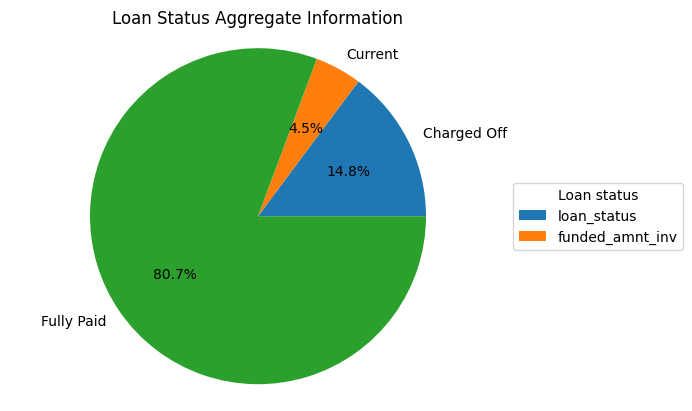

In [1017]:
# plotting pie chart for different types of loan status
loan_status_grouped_data = df.groupby(['loan_status'])['funded_amnt_inv'].sum().reset_index()

plt.figure()
plt.pie(loan_status_grouped_data["funded_amnt_inv"],labels=loan_status_grouped_data["loan_status"],autopct='%1.1f%%')
plt.title('Loan Status Aggregate Information')
plt.axis('equal')
plt.legend(loan_status_grouped_data,title="Loan status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

/var/folders/ws/t318bm0j4md5pdkww376lp5m0000gq/T/ipykernel_65981/1958851734.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  chargedOffTotalSum = float(investment_sum["Charged Off"])
/var/folders/ws/t318bm0j4md5pdkww376lp5m0000gq/T/ipykernel_65981/1958851734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  fullyPaidTotalSum = float(investment_sum["Fully Paid"])
/var/folders/ws/t318bm0j4md5pdkww376lp5m0000gq/T/ipykernel_65981/1958851734.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  currentTotalSum = float(investment_sum["Current"])


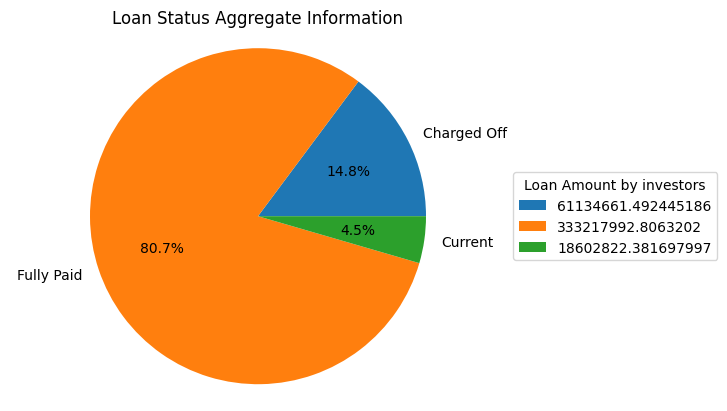

In [1018]:
# plotting pie chart for different types of loan_status with amount committed by investors for that loan
chargedOffLoans = df.loc[(df["loan_status"] == "Charged Off")]
currentLoans = df.loc[(df["loan_status"] == "Current")]
fullyPaidLoans = df.loc[(df["loan_status"]== "Fully Paid")]

data  = [
    {
        "Charged Off": chargedOffLoans["funded_amnt_inv"].sum(), 
        "Fully Paid":fullyPaidLoans["funded_amnt_inv"].sum(), 
        "Current":currentLoans["funded_amnt_inv"].sum()
    }
]

investment_sum = pd.DataFrame(data) 
chargedOffTotalSum = float(investment_sum["Charged Off"])
fullyPaidTotalSum = float(investment_sum["Fully Paid"])
currentTotalSum = float(investment_sum["Current"])

loan_status = [chargedOffTotalSum,fullyPaidTotalSum,currentTotalSum]
loan_status_labels = 'Charged Off','Fully Paid','Current'
plt.pie(loan_status,labels=loan_status_labels,autopct='%1.1f%%')
plt.title('Loan Status Aggregate Information')
plt.axis('equal')
plt.legend(loan_status,title="Loan Amount by investors",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [1019]:
df["purpose"].value_counts()

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64

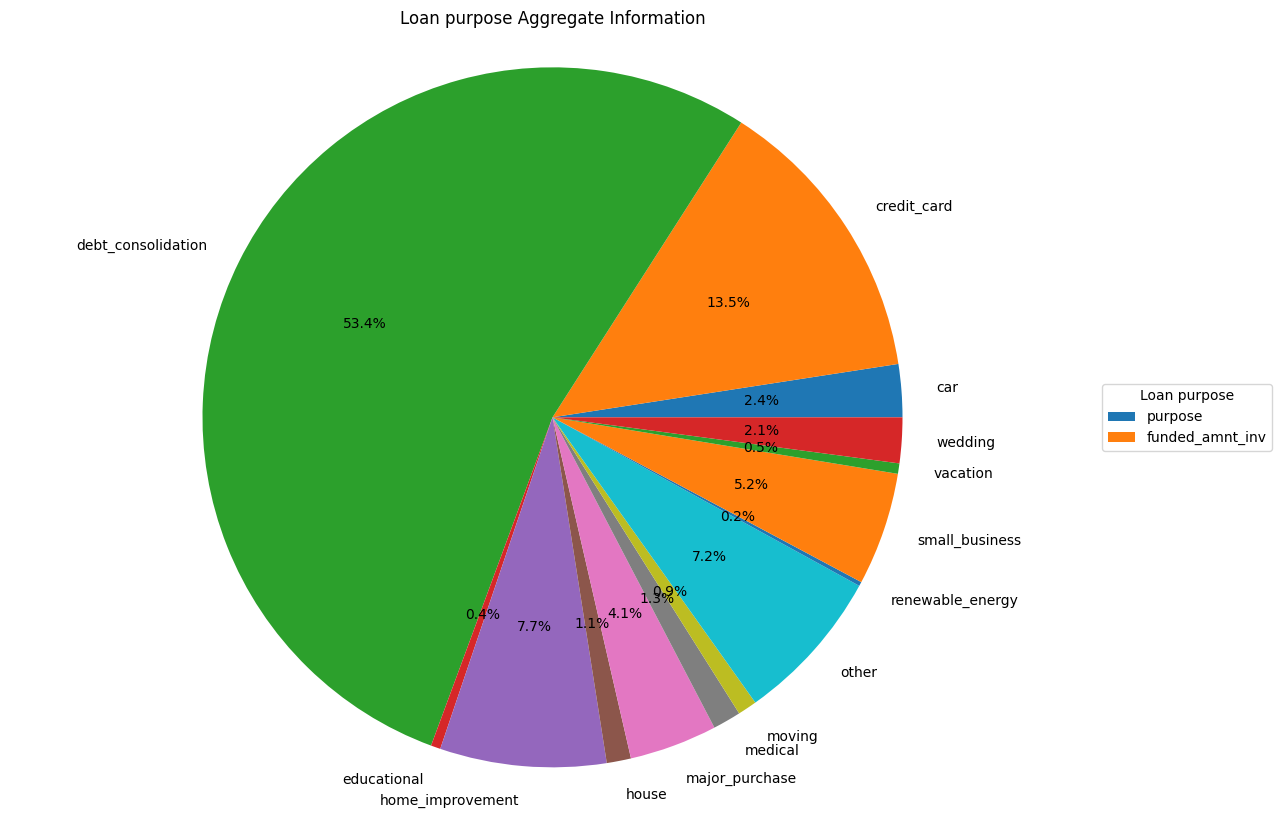

In [1020]:
# plotting pie chart for different types of purpose
loans_purpose_grouped_data = df.groupby(['purpose'])['funded_amnt_inv'].sum().reset_index()

plt.figure(figsize=(14, 10))
plt.pie(loans_purpose_grouped_data["funded_amnt_inv"],labels=loans_purpose_grouped_data["purpose"],autopct='%1.1f%%')
plt.title('Loan purpose Aggregate Information')
plt.axis('equal')
plt.legend(loans_purpose_grouped_data,title="Loan purpose",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

# Data Cleaning

In [1021]:
# in dataset, we can see around half of the columns are null
# completely, hence remove all columns having no values
loan = df.dropna(axis=1, how="all")
print("Looking into remaining columns info:")
print(loan.info(max_cols=200))

Looking into remaining columns info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 

Now, we will remove all the Demographic and Customer Behavioural features which is of no use for default analysis for credit approval.

In [1022]:
colsToDrop = ["id", "member_id", "funded_amnt", "emp_title", "pymnt_plan", "url", "desc", "title", "zip_code", "delinq_2yrs", 
              "mths_since_last_delinq", "mths_since_last_record", "revol_bal", "initial_list_status", "out_prncp", "out_prncp_inv", 
              "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", 
              "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "last_credit_pull_d", 
              "collections_12_mths_ex_med", "policy_code", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens", 
              "application_type", "addr_state"]
loan.drop(colsToDrop, axis=1, inplace=True)
print("Features we are left with : ", ', '.join(loan.columns))

Features we are left with :  loan_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, dti, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_util, total_acc, pub_rec_bankruptcies


/var/folders/ws/t318bm0j4md5pdkww376lp5m0000gq/T/ipykernel_65981/2032645339.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.drop(colsToDrop, axis=1, inplace=True)


<h3>Handle missing values</h3>

In [1023]:
# in 12 unique values we have 10+ years the most for emp_length, 
# but it is highly dependent variable so we will not impute
# but remove the rows with null values which is around 2.5%
loan.dropna(axis=0, subset=["emp_length"], inplace=True)

# remove NA rows for revol_util as its dependent and is around 0.1%
# revolving line utilization rate is a key metric used to assess how much of the available revolving credit 
# (such as credit cards, lines of credit, etc.) a borrower is currently using.
# it provides insight into the borrower's credit usage relative to their total available credit.
# This metric is important for both lenders and borrowers, as it can impact credit scores and lending decisions.
loan.dropna(axis=0, subset=["revol_util"], inplace=True)

/var/folders/ws/t318bm0j4md5pdkww376lp5m0000gq/T/ipykernel_65981/2528030324.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.dropna(axis=0, subset=["emp_length"], inplace=True)
/var/folders/ws/t318bm0j4md5pdkww376lp5m0000gq/T/ipykernel_65981/2528030324.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.dropna(axis=0, subset=["revol_util"], inplace=True)


<h3> Standardization </h3>

In [1024]:
# update int_rate, revol_util without % sign and as numeric type
interest_rate = loan["int_rate"].apply(lambda x:x.replace("%", ""))
loan["int_rate"] = interest_rate.astype('float32')

revolving_line_utilization = loan["revol_util"].apply(lambda x:x.split('%')[0])
loan["revol_util"] = revolving_line_utilization.astype('float32')

/var/folders/ws/t318bm0j4md5pdkww376lp5m0000gq/T/ipykernel_65981/3495398848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan["int_rate"] = interest_rate.astype('float32')
/var/folders/ws/t318bm0j4md5pdkww376lp5m0000gq/T/ipykernel_65981/3495398848.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan["revol_util"] = revolving_line_utilization.astype('float32')


In [1025]:
#get term data
loan["term"].value_counts()

term
36 months    28243
60 months    10352
Name: count, dtype: int64

In [1026]:
# remove text data from term feature and store as numerical
loan_term = loan["term"].apply(lambda x:x.split()[0])
loan["term"] = pd.to_numeric(loan_term)

/var/folders/ws/t318bm0j4md5pdkww376lp5m0000gq/T/ipykernel_65981/655829510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan["term"] = pd.to_numeric(loan_term)


Removing records with loan status as “Current”, as the loan is currently running and we can’t infer any information regarding default from such loans.

In [1027]:
# remove the rows with loan_status as "Current"
loan = loan[loan["loan_status"].apply(lambda x:False if x == "Current" else True)]

# update loan_status as Fully Paid to 0 and Charged Off to 1
loan["loan_status"] = loan["loan_status"].apply(lambda x: 0 if x == "Fully Paid" else 1)

# update emp_length feature with continuous values as int
# where (< 1 year) is assumed as 0 
# 10+ years is assumed as 10 
# rest are stored as their magnitude
loan["emp_length"] = pd.to_numeric(loan["emp_length"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

# look through the purpose value counts
loan_purpose_values = loan["purpose"].value_counts()*100/loan.shape[0]

# remove rows with less than 1% of value counts in paricular purpose 
loan_purpose_delete = loan_purpose_values[loan_purpose_values<1].index.values
loan = loan[[False if p in loan_purpose_delete else True for p in loan["purpose"]]]

<h3> Outlier Treatment </h3>

In [1028]:
#describe borrower annual income
loan["annual_inc"].describe()

count    3.638800e+04
mean     6.954019e+04
std      6.495376e+04
min      4.080000e+03
25%      4.149600e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [1029]:
# for annual_inc, the highest value is 6000000 where 75% quantile value is 83000, and is 100 times the mean
# we need to remomve outliers from annual_inc i.e. 99 to 100%
annual_inc_q = loan["annual_inc"].quantile(0.99)
loan = loan[loan["annual_inc"] < annual_inc_q]

In [1030]:
#describe borrower's number of open credit lines in the borrower's credit file
loan["open_acc"].describe()

count    36024.000000
mean         9.305574
std          4.378094
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [1031]:
# for open_acc, the highest value is 44 where 75% quantile value is 12, and is 5 times the mean
# we need to remomve outliers from open_acc i.e. 99.9 to 100%
open_acc_q = loan["open_acc"].quantile(0.999)
loan = loan[loan["open_acc"] < open_acc_q]

In [1032]:
#describe borrower's total number of credit lines currently in the borrower's credit file
loan["total_acc"].describe()

count    35983.000000
mean        22.030209
std         11.303195
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

In [1033]:
# for total_acc, the highest value is 90 where 75% quantile value is 29, and is 4 times the mean
# we need to remomve outliers from total_acc i.e. 98 to 100%
total_acc_q = loan["total_acc"].quantile(0.98)
loan = loan[loan["total_acc"] < total_acc_q]

In [1034]:
#describe number of derogatory public records
loan["pub_rec"].describe()

count    35205.000000
mean         0.054566
std          0.236568
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

In [1035]:
# for pub_rec, the highest value is 4 where 75% quantile value is 0, and is 4 times the mean
# we need to remomve outliers from pub_rec i.e. 99.5 to 100%
pub_rec_q = loan["pub_rec"].quantile(0.995)
loan = loan[loan["pub_rec"] <= pub_rec_q]

Metrics Derivation
Issue date is not in the standard format also we can split the date into two columns with month and the year which will make it easy for analysis
Year in the datetime requires year between 00 to 99 and in some cases year is single digit number i.e. 9 writing a function which will convert such dates to avoid exception in date conversion.

In [1036]:
def standerdisedate(date):
    year = date.split("-")[0]
    if(len(year) == 1):
        date = "0"+date
    return date


loan['issue_d'] = loan['issue_d'].apply(lambda x:standerdisedate(x))
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

# extracting month and year from issue_date
loan['month'] = loan['issue_d'].apply(lambda x: x.month)
loan['year'] = loan['issue_d'].apply(lambda x: x.year)

# get year from issue_d and replace the same
loan["earliest_cr_line"] = pd.to_numeric(loan["earliest_cr_line"].apply(lambda x:x.split('-')[1]))

Binning Continuous features:

In [1037]:
# describe loan amount
loan["loan_amnt"].describe()

count    35152.000000
mean     11064.723913
std       7243.360102
min        500.000000
25%       5500.000000
50%       9975.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [1038]:
# create bins for loan_amnt range
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=bucket_l)

In [1039]:
# describe interest rate
loan["int_rate"].describe()

count    35152.000000
mean        11.939897
std          3.664741
min          5.420000
25%          8.940000
50%         11.830000
75%         14.350000
max         24.110001
Name: int_rate, dtype: float64

In [1040]:
# create bins for int_rate range
bins = [0, 7.5, 10, 12.5, 15, 100]
bucket_l = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=bucket_l)

In [1041]:
# create bins for annual_inc range
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=bucket_l)

In [1042]:
# create bins for installment range
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=500:
        return 'medium'
    elif n > 500 and n <=800:
        return 'high'
    else:
        return 'very high'

loan['installment'] = loan['installment'].apply(lambda x: installment(x))

# create bins for dti range
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_l = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
loan['dti_range'] = pd.cut(loan['dti'], bins, labels=bucket_l)


In [1043]:
# get total count of Paid off (0) and Charged off (1) i.e. defaulters from loan status
loan["loan_status"].value_counts()

loan_status
0    30090
1     5062
Name: count, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

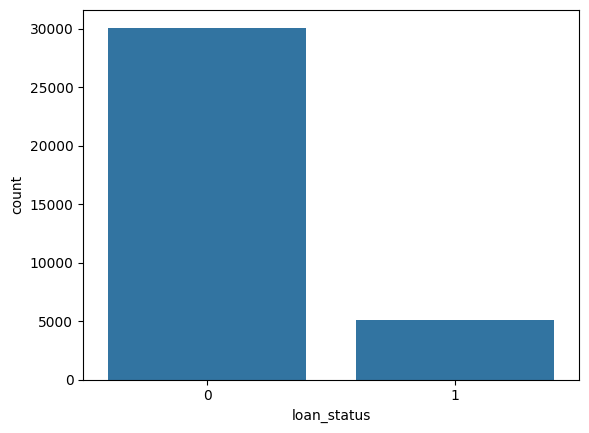

In [1044]:
# check for amount of defaults in the data using countplot
sns.countplot(loan, x="loan_status")

From above plot we can see that around 16% i.e. 5062 people are defaulters in total 35152 records.

# Univariate Analysis

In [1045]:
def plotUnivariateRatioBar(feature, data=loan, rsorted=True):
    plt.figure(figsize=(10,5))
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        # calculate features count in feature filter for defaulters
        feature_count = len(feature_filter[feature_filter["loan_status"]==1])
        feature_values.append(feature_count*100/feature_filter["loan_status"].count())

    plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
    plt.title("Loan Defaults wrt "+str(feature)+" feature - countplot")
    plt.xlabel(feature, fontsize=16)
    plt.ylabel("defaulter %", fontsize=16)
    plt.show()

# function to plot univariate with default status scale 0 - 1
def plotUnivariateBar(x):
    plt.figure(figsize=(10,5))
    #plot bar graph against feature on x-axis and loan status on y-axis
    sns.barplot(x=x, y='loan_status', data=loan)
    plt.title("Loan Defaults wrt "+str(x)+" - countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

<h3> a. Categorical Features </h3>

In [1046]:
#get term values
loan["term"].value_counts()

term
36    26468
60     8684
Name: count, dtype: int64

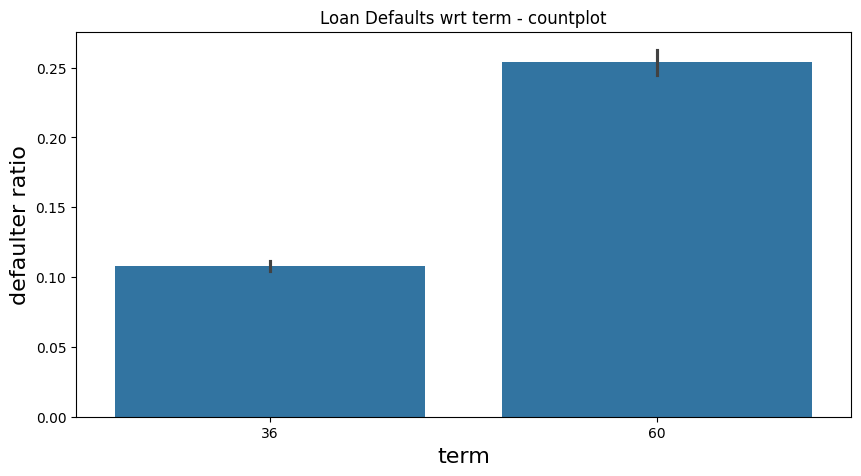

In [1047]:
# check for defaulters wrt term in the data using countplot
plotUnivariateBar("term")

From above plot for `term` we can infer that the defaulters rate is increasing wrt term ie. The number of payments on the loan, hence the chances of loan getting deaulted is less for 36m than 60m.

so `term` can become a deciding variable for loan approval.

In [1048]:
#get grade values
loan["grade"].value_counts()

grade
B    10697
A     9063
C     7193
D     4674
E     2405
F      860
G      260
Name: count, dtype: int64

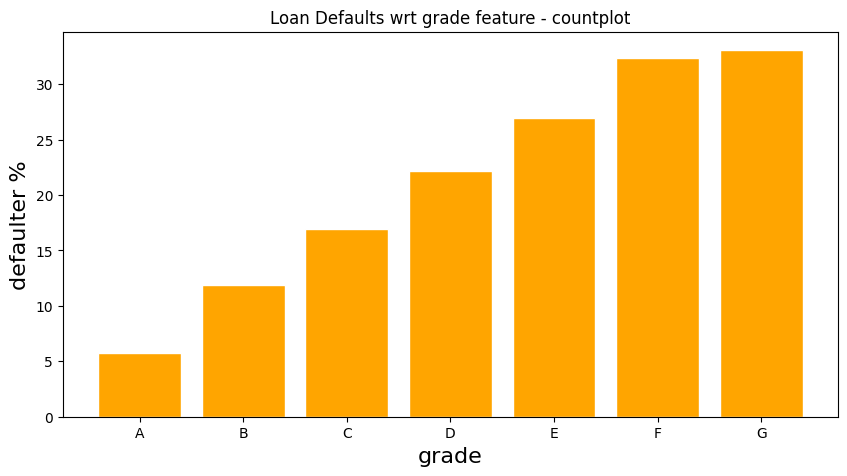

In [1049]:
# check for defaulters wrt grade in the data using countplot
plotUnivariateRatioBar("grade")

<Axes: xlabel='grade', ylabel='loan_status'>

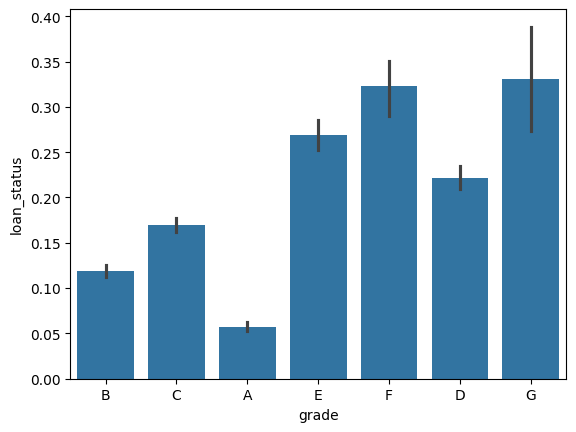

In [1114]:
sns.barplot(data=loan, x="grade", y="loan_status")

From above plot for `grade` we can infer that the defaulters rate is increasing wrt grade, hence the chances of loan getting deaulted increases with the grade from A moving towards G.

so `grade` can become a deciding variable for loan approval.

In [1050]:
#get sub_grade values
loan["sub_grade"].value_counts()

sub_grade
A4    2629
B3    2575
A5    2466
B5    2428
B4    2243
C1    1901
B2    1829
C2    1766
A3    1635
B1    1622
C3    1359
A2    1341
D2    1187
C4    1111
C5    1056
D3    1026
A1     992
D1     859
D4     845
D5     757
E1     669
E2     545
E3     462
E4     389
E5     340
F1     268
F2     208
F3     149
F4     135
F5     100
G1      85
G2      69
G3      43
G4      41
G5      22
Name: count, dtype: int64

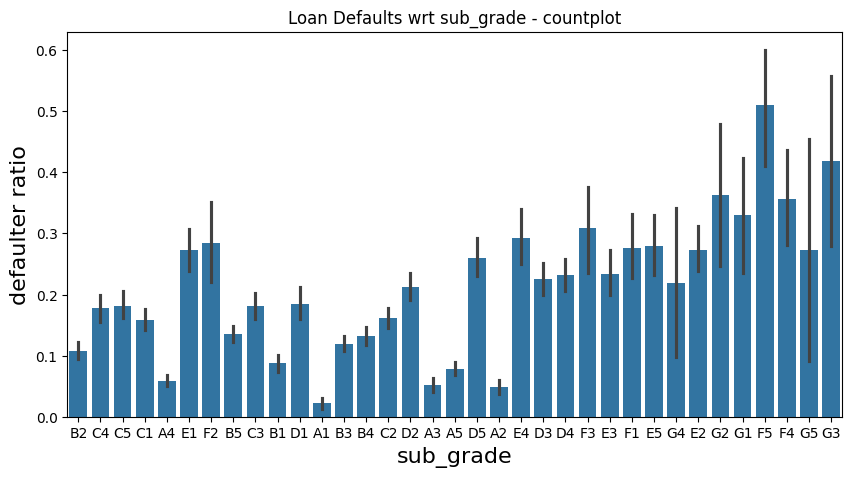

In [1051]:
# check for defaulters wrt sub_grade in the data using countplot
plotUnivariateBar("sub_grade")

From above plot for `sub_grade` we can infer that the defaulters rate is increasing wrt `sub_grade`, hence the chances of loan getting deaulted increases with the `sub_grade` from A1 moving towards G5.

so `‘sub_grade’` can become a deciding variable for loan approval.

In [1052]:
#get home_ownership values
loan["home_ownership"].value_counts()

home_ownership
RENT        17139
MORTGAGE    15322
OWN          2598
OTHER          90
NONE            3
Name: count, dtype: int64

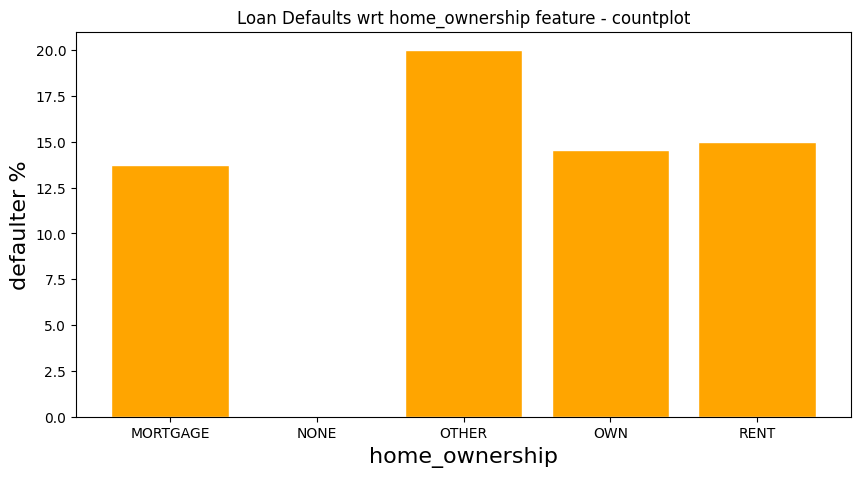

In [1053]:
# check for defaulters wrt home_ownership in the data 
plotUnivariateRatioBar("home_ownership")

From above plot for `home_ownership` we can infer that the defaulters rate is almost constant here (it is quite more for OTHERS but we dont know what is in there, so we’ll not consider it for analysis), hence defaulter does not depends on `home_ownership`

In [1054]:
#get verification_status values
loan["verification_status"].value_counts()

verification_status
Not Verified       15274
Verified           10958
Source Verified     8920
Name: count, dtype: int64

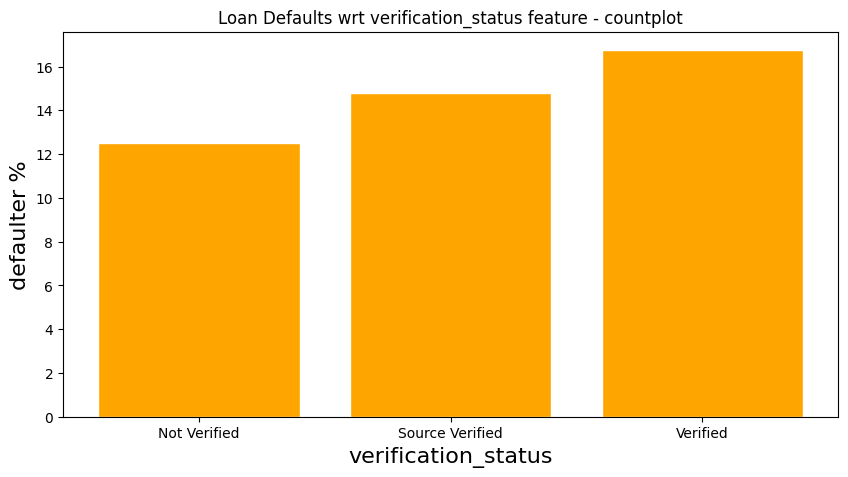

In [1055]:
# check for defaulters wrt verification_status in the data
plotUnivariateRatioBar("verification_status")

From above plot for `verification_status` we can infer that the defaulters rate is increasing and is less for Not Verified users than Verified ones, but not useful for analysis.

but we can not deduce that verified users are likely to be defaulter.

In [1056]:
#get purpose values
loan["purpose"].value_counts()

purpose
debt_consolidation    17069
credit_card            4745
other                  3595
home_improvement       2623
major_purchase         2010
small_business         1644
car                    1404
wedding                 899
medical                 627
moving                  536
Name: count, dtype: int64

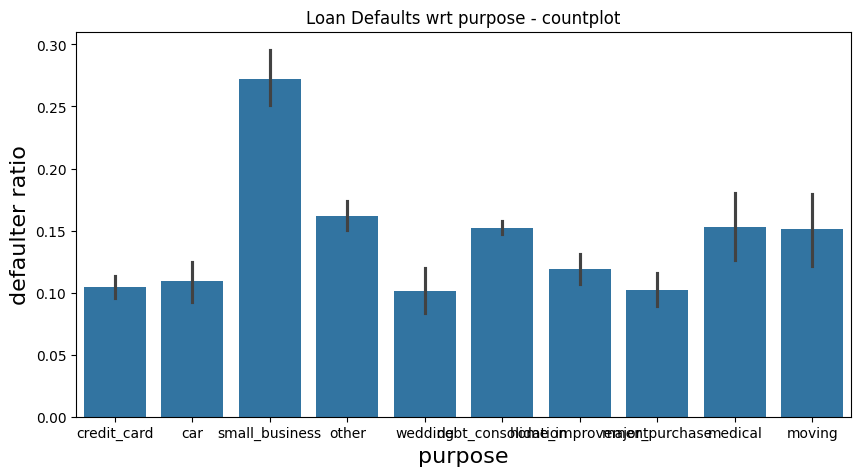

In [1057]:
# check for defaulters wrt purpose in the data using countplot
plotUnivariateBar("purpose")

From above plot for `purpose` we can infer that the defaulters rate is nearly constant for all purpose type except ‘small business’, hence rate will depend on purpose of the loan.

In [1058]:
#get open_acc values
loan["open_acc"].value_counts()

open_acc
7     3675
6     3557
8     3556
9     3396
10    2888
5     2841
11    2470
4     2123
12    2034
13    1703
3     1321
14    1276
15    1010
16     810
17     607
2      503
18     432
19     301
20     221
21     162
22      91
23      59
24      35
25      35
26      16
28      13
27      11
29       6
Name: count, dtype: int64

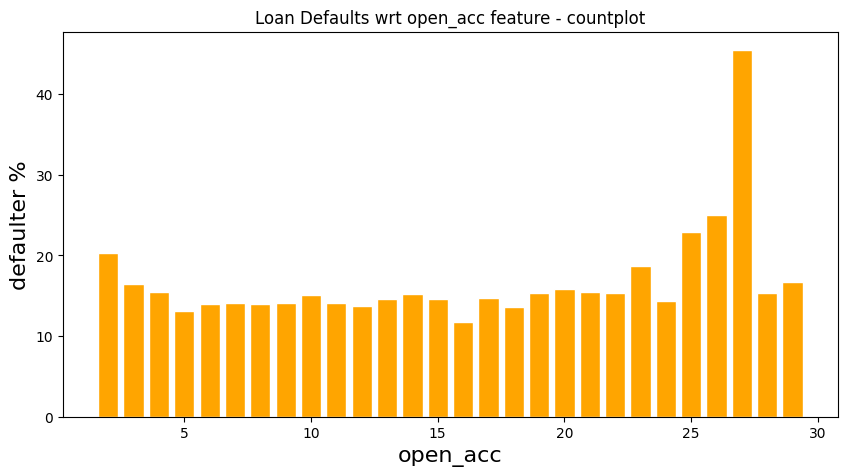

In [1059]:
# check for defaulters wrt open_acc in the data using countplot
plotUnivariateRatioBar("open_acc")

From above plot for `open_acc` we can infer that the defaulters rate is nearly constant for feature open_acc, hence rate will not depend on open_acc feature ie. The number of open credit lines in the borrower's credit file doesn't qualify loan approval metric.

In [1060]:
#get pub_rec values
loan["pub_rec"].value_counts()

pub_rec
0    33348
1     1804
Name: count, dtype: int64

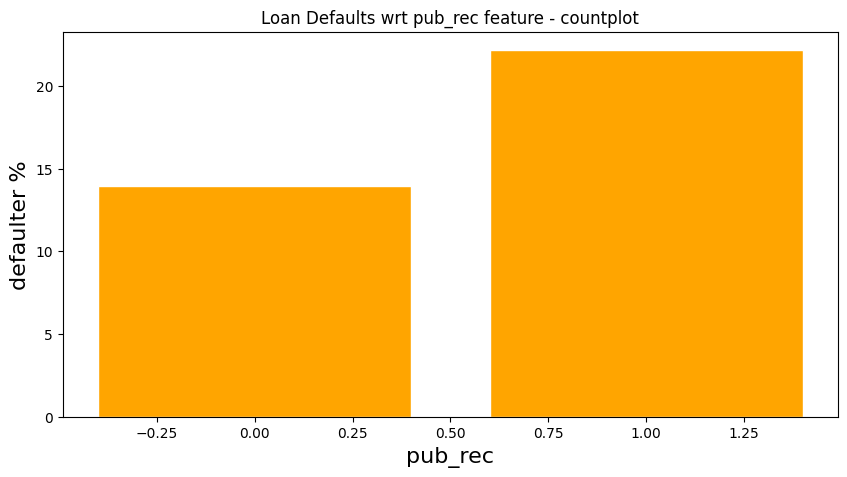

In [1061]:
# check for defaulters wrt pub_rec in the data using countplot
plotUnivariateRatioBar("pub_rec")

From above plot for `pub_rec` we can infer that the defaulters rate is nearly increasing as it is less for 0 and more for pub_rec with value 1, but as other values are very less as compared to 0 we’ll not consider this for analysis.

In [1062]:
#get pub_rec_bankruptcies values
loan["pub_rec_bankruptcies"].value_counts()

pub_rec_bankruptcies
0.0    33046
1.0     1461
Name: count, dtype: int64

/var/folders/ws/t318bm0j4md5pdkww376lp5m0000gq/T/ipykernel_65981/2450257127.py:12: RuntimeWarning: invalid value encountered in scalar divide
  feature_values.append(feature_count*100/feature_filter["loan_status"].count())


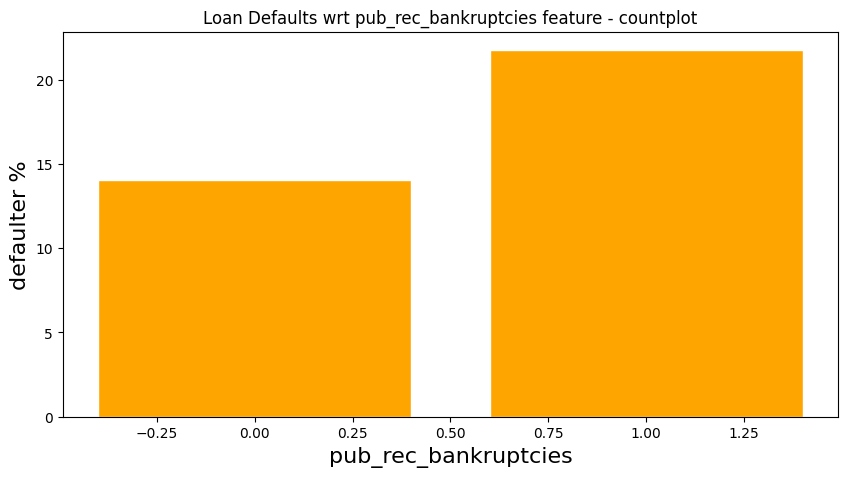

In [1063]:
# check for defaulters wrt pub_rec_bankruptcies in the data using countplot
plotUnivariateRatioBar("pub_rec_bankruptcies")

From above plot for `pub_rec_bankruptcies` we can infer that the defaulters rate is nearly increasing as it is less for 0 and more for pub_rec_bankruptcies with value 1, but as other values are very less as compared to 0 we’ll not consider this for analysis.

b. Continuous Features

In [1064]:
#get emp_length values
loan["emp_length"].value_counts()

emp_length
10    7799
0     4260
2     4033
3     3797
4     3133
5     3006
1     2989
6     2048
7     1603
8     1349
9     1135
Name: count, dtype: int64

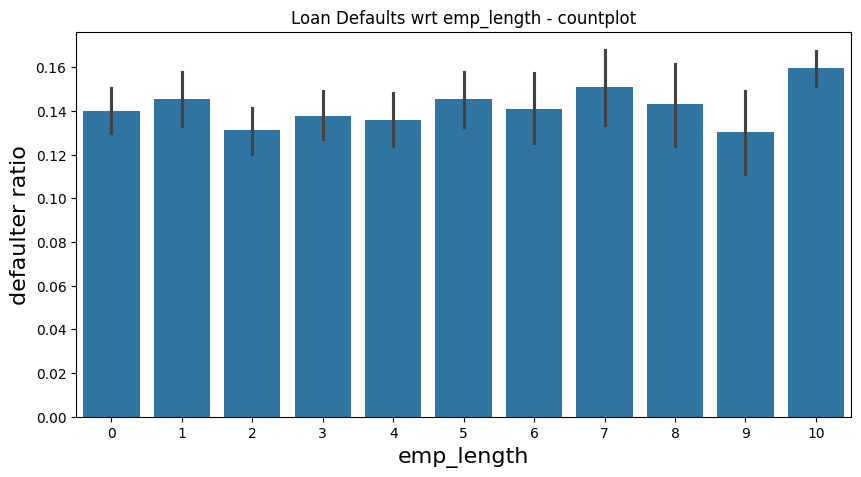

In [1065]:
# check for defaulters wrt emp_length in the data using countplot
plotUnivariateBar("emp_length")

From above plot for `emp_length` we can infer that the defaulters rate is constant here, hence defaulter does not depends on Employment length in years.

In [1066]:
#get month value counts
loan["month"].value_counts()

month
12    3905
11    3655
10    3384
9     3169
8     3109
7     3056
6     2873
5     2649
4     2585
3     2452
1     2190
2     2125
Name: count, dtype: int64

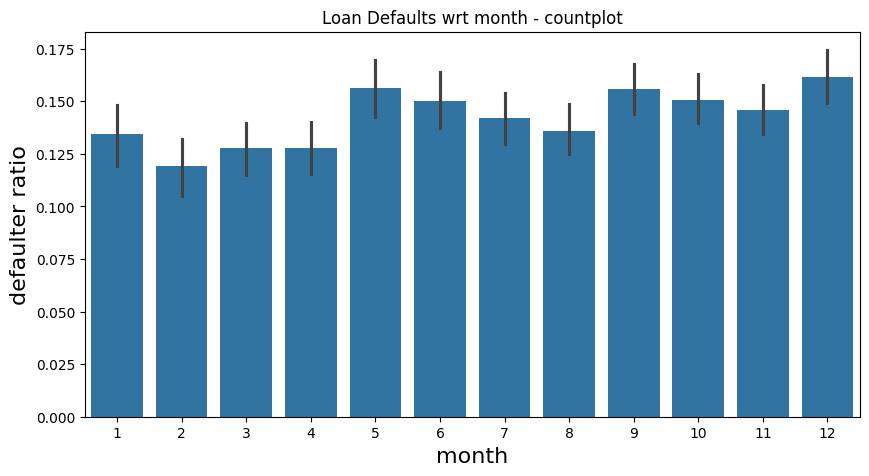

In [1067]:
# check for defaulters wrt month in the data using countplot
plotUnivariateBar("month")

From above plot for `month` we can infer that the defaulters rate is nearly constant here, hence not useful

In [1068]:
#get year value counts
loan["year"].value_counts()

year
2011    18714
2010    10475
2009     4300
2008     1435
2007      228
Name: count, dtype: int64

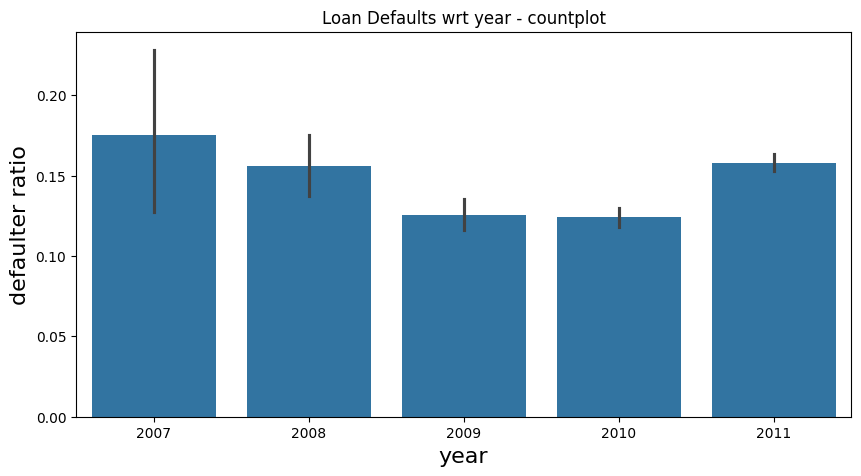

In [1069]:
# check for defaulters wrt year in the data using countplot
plotUnivariateBar("year")

From above plot for `year` we can infer that the defaulters rate is nearly constant here, hence not useful for analysis.

In [1070]:
#get earliest_cr_line value counts
loan["earliest_cr_line"].value_counts()

earliest_cr_line
0     2972
99    2711
98    2553
1     2318
97    2181
96    2011
95    1895
2     1766
94    1761
3     1723
4     1649
5     1368
93    1288
6     1061
92     934
90     882
91     850
89     724
7      657
88     611
87     516
86     406
85     381
84     329
83     278
82     173
81     146
80     140
8      135
79     127
78     125
77      88
76      70
75      62
74      44
73      41
71      37
72      32
70      32
69      25
68      14
67      12
66       7
63       6
65       5
62       2
56       1
50       1
54       1
64       1
Name: count, dtype: int64

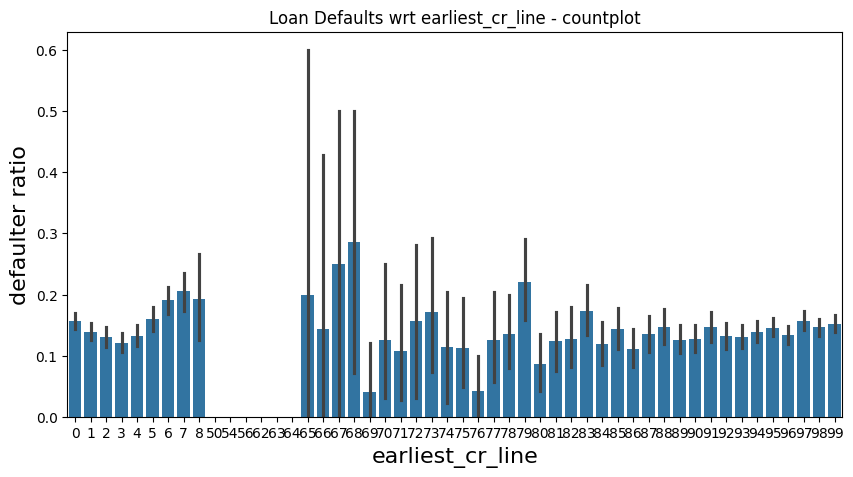

In [1071]:
# check for defaulters wrt earliest_cr_line in the data
plotUnivariateBar("earliest_cr_line")

From above plot for `earliest_cr_line` we can infer that the defaulters rate is nearly constant for all purpose type except year around 65, hence rate does not depends on earliest_cr_line ie. The month the borrower's earliest reported credit line was opened will not be useful for analysis.

In [1072]:
#get inq_last_6mths value counts
loan["inq_last_6mths"].value_counts()

inq_last_6mths
0    17254
1     9705
2     5077
3     2641
4      270
5      119
6       53
7       23
8       10
Name: count, dtype: int64

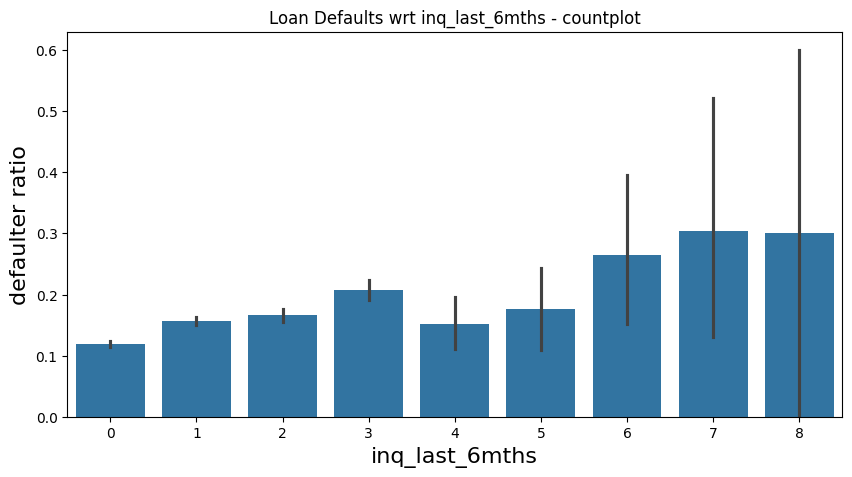

In [1073]:
# check for defaulters wrt inq_last_6mths in the data
plotUnivariateBar("inq_last_6mths")

From above plot for `inq_last_6mths` we can infer that the defaulters rate is not consistently increasing with inq_last_6mths ie. The number of inquiries in past 6 months (excluding auto and mortgage inquiries), hence not useful for analysis.

In [1074]:
#get revol_util value counts
loan["revol_util"].value_counts()

revol_util
0.000000     839
63.000000     57
0.200000      55
66.699997     55
46.400002     53
            ... 
25.740000      1
0.830000       1
47.360001      1
24.650000      1
7.280000       1
Name: count, Length: 1084, dtype: int64

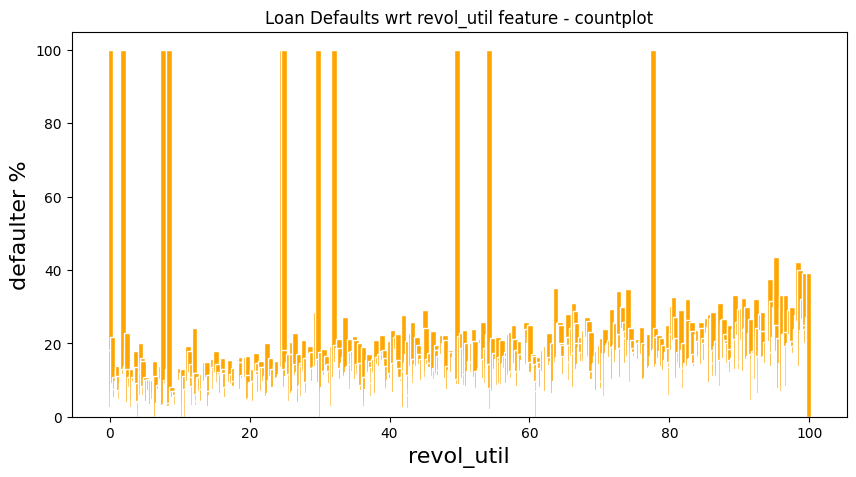

In [1075]:
# check for defaulters wrt revol_util in the data using countplot
plotUnivariateRatioBar("revol_util")

From above plot for `revol_util` we can infer that the defaulters rate is fluctuating where some have complete 100% ratio for defaulter and is increasing as the magnitude increases, hence rate will depend on revol_util feature ie. Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit is useful feature for loan analysis.

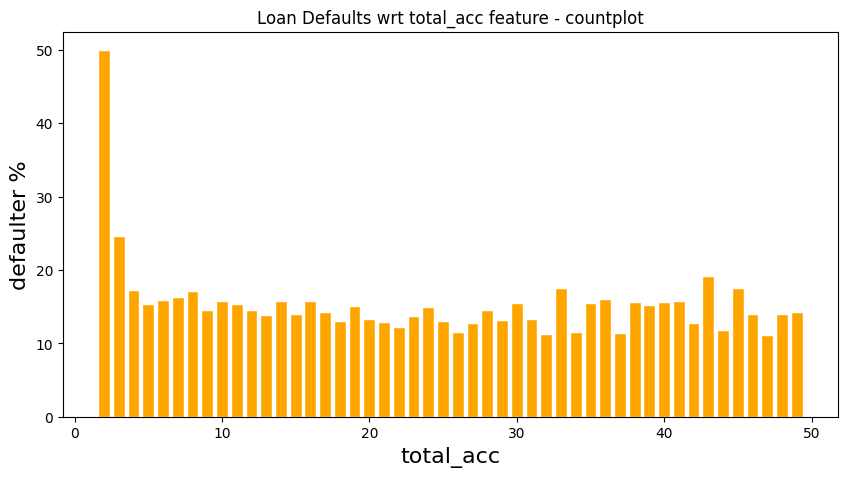

In [1076]:
# check for defaulters wrt total_acc in the data using countplot
plotUnivariateRatioBar("total_acc")

From above plot for `total_acc` we can infer that the defaulters rate is nearly constant for all total_acc values ie. The total number of credit lines currently in the borrower's credit file, hence rate will not depend on total_acc feature

In [1077]:
#get loan_amnt_range value counts
loan["loan_amnt_range"].value_counts()

loan_amnt_range
5000-10000     11792
0-5000          8382
10000-15000     7160
15000-20000     4014
20000-25000     2564
25000+          1240
Name: count, dtype: int64

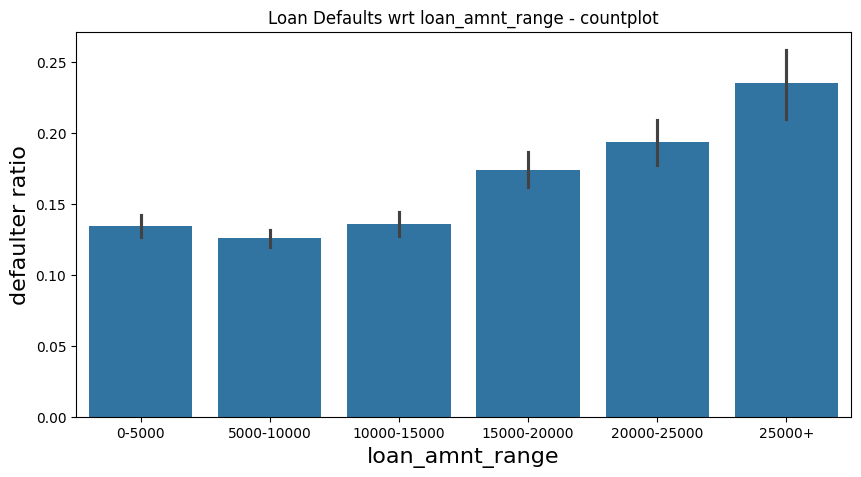

In [1078]:
# check for defaulters wrt loan_amnt_range in the data using countplot
plotUnivariateBar("loan_amnt_range")    

From above plot for `loan_amnt_range` we can infer that the defaulters rate is increasing with loan_amnt_range values, hence rate will depend on loan_amnt_range feature. so as loan amount range increases chances for loan will be defaulted increases.

In [1079]:
#get int_rate_range value counts
loan["int_rate_range"].value_counts()

int_rate_range
10-12.5    8621
12.5-15    8181
15+        7241
7.5-10     6295
0-7.5      4814
Name: count, dtype: int64

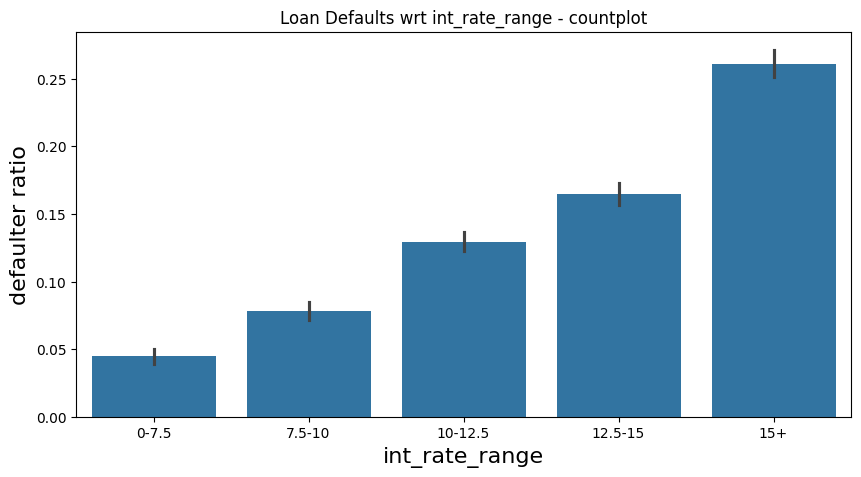

In [1080]:
# check for defaulters wrt int_rate_range in the data
plotUnivariateBar("int_rate_range")

From above plot for `int_rate_range` we can infer that the defaulters rate is decreasing with int_rate_range values, hence rate will depend on int_rate_range feature

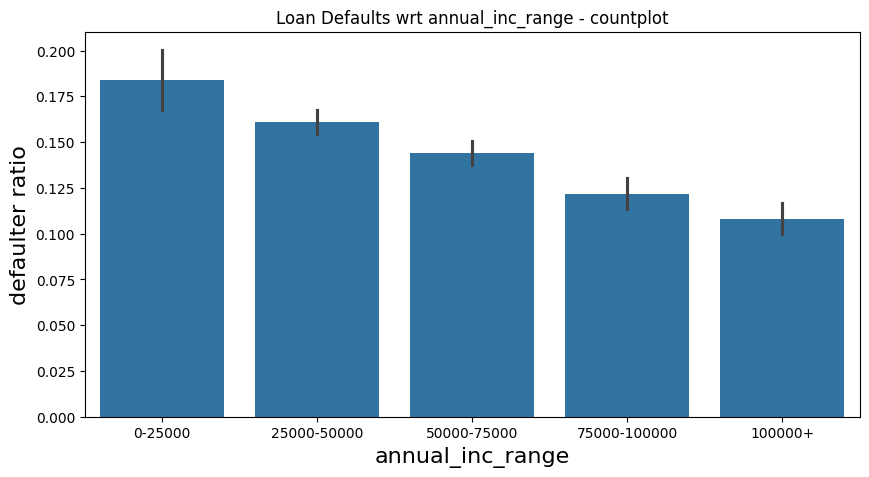

In [1081]:
# check for defaulters wrt annual_inc_range in the data
plotUnivariateBar("annual_inc_range")

From above plot for `annual_inc_range` we can infer that the defaulters rate is decreasing as with annual_inc_range values, hence rate will depend on annual_inc_range feature.

In [1082]:
#get dti_range value counts
loan["dti_range"].value_counts()

dti_range
10-15%    8846
15-20%    8107
5-10%     7163
20-25%    6036
0-5%      4443
25%+       557
Name: count, dtype: int64

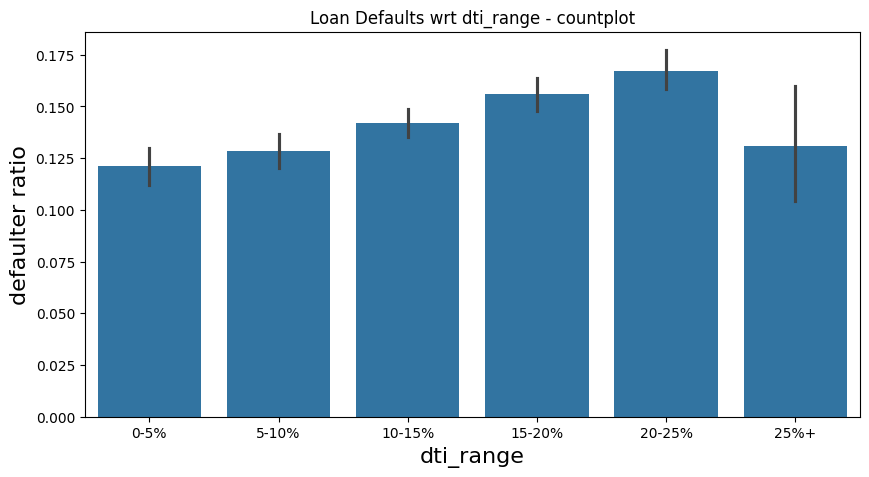

In [1083]:
# check for defaulters wrt dti_range in the data using countplot
plotUnivariateBar("dti_range")

From above plot for `dti_range` we can infer that the defaulters rate is increasing as with dti_range values, hence rate will depend on dti_range feature.

In [1084]:
#get installment value counts
loan["installment"].value_counts()

installment
medium       17324
low          11679
high          4805
very high     1344
Name: count, dtype: int64

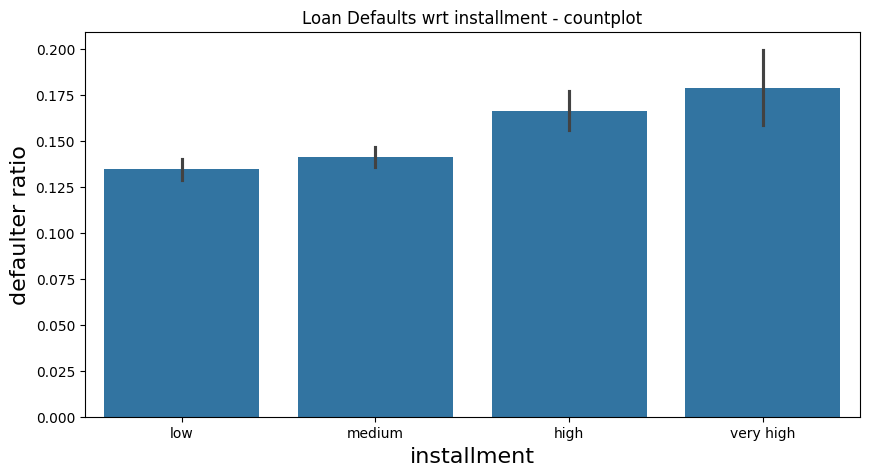

In [1085]:
# check for defaulters wrt installment range in the data
plotUnivariateBar("installment")

From above plot for ‘installment’ we can infer that the defaulters rate is increasing as with installment values, hence rate will depend on dti_range feature.

Therefore, following are the important feature we deduced from above Univariate analysis:

<ul>
<li>term</li>
<li>grade</li>
<li>purpose</li>
<li>pub_rec</li>
<li>pub_rec_bankruptcies</li>
<li>revol_util</li>
<li>funded_amnt_inv</li>
<li>int_rate</li>
<li>annual_inc</li>
<li>dti</li>
<li>installment</li>
</ul>

# Bivariate Analysis

In [1086]:
# function to plot scatter plot for two features
def plotScatter(x, y):
    plt.figure(figsize=(16,6))
    sns.scatterplot(x=x, y=y, hue="loan_status", data=loan)
    plt.title("Scatter plot between "+x+" and "+y)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    
def plotBivariateBar(x, hue):
    plt.figure(figsize=(16,6))
    sns.barplot(x=x, y='loan_status', hue=hue, data=loan)
    plt.title("Loan Default ratio wrt "+x+" for "+hue+" in the data using countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

def plotBivariateCategorical(x, y):
    plt.figure(figsize=(16,6))
    # Create contingency table
    contingency_table = pd.crosstab(loan[x], loan[y])
    # Visualize contingency table as heatmap
    sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
    plt.title("Contingency Table between "+x+" and "+y+" in the data using Heatmap")
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()

def plotJoint(x, y):
    plt.figure(figsize=(16,30))
    sns.jointplot(x=x, y=y, data=loan, kind="reg")
    plt.title("Joint plot between "+x+" and "+y)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()

def plotBivariateHistogram(x, hue):
    plt.figure(figsize=(16,6))
    sns.histplot(x=x, hue=hue, data=loan, multiple='stack', kde=True)
    plt.title("Loan Default ratio wrt "+x+" for "+hue+" in the data using Histogram")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("Frequency", fontsize=16)
    plt.show()


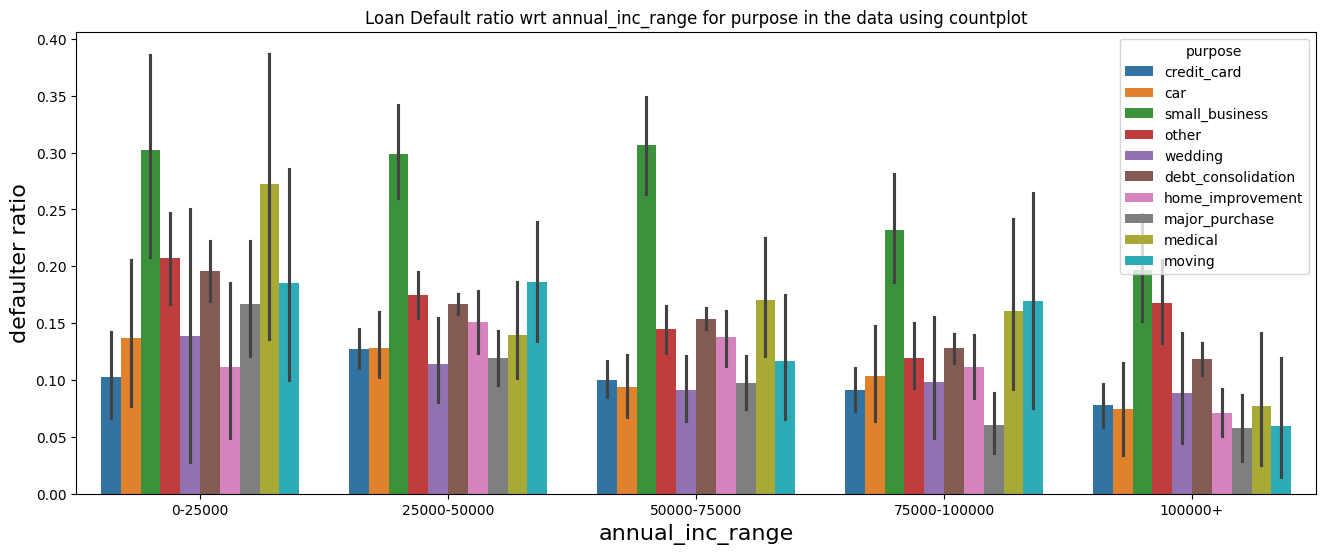

In [1087]:
# check for defaulters wrt annual_inc and purpose in the data using countplot
plotBivariateBar("annual_inc_range", "purpose")

From above plot, we can infer it doesn’t shows any correlation

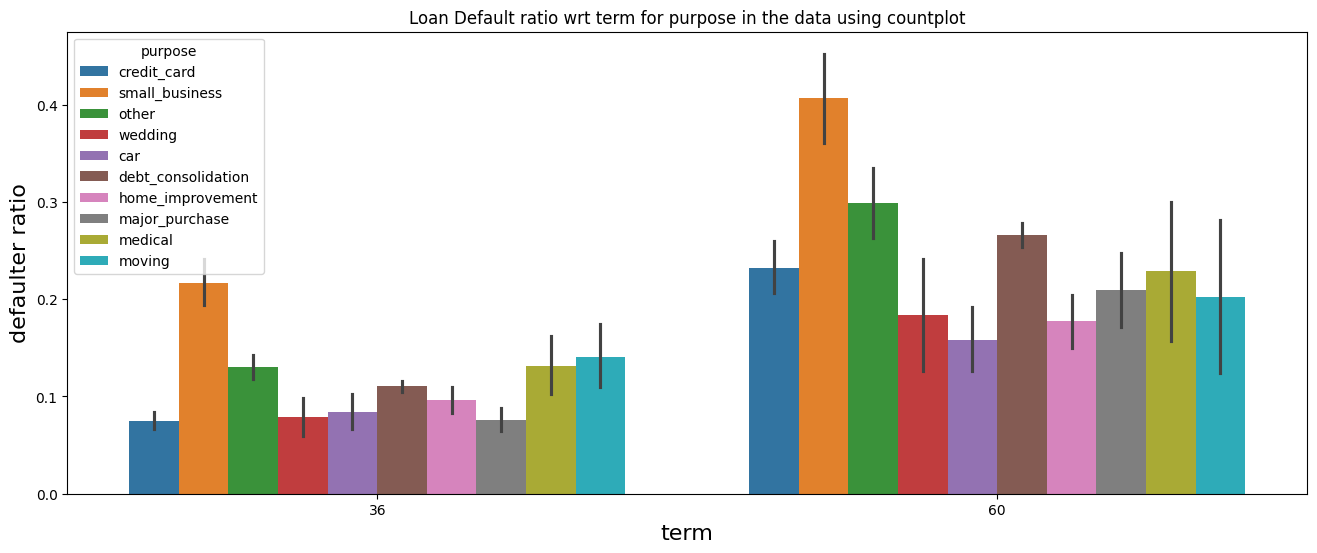

In [1088]:
# check for defaulters wrt term and purpose in the data 
plotBivariateBar("term", "purpose")

As we can see , default ratio increases for every purpose wrt term

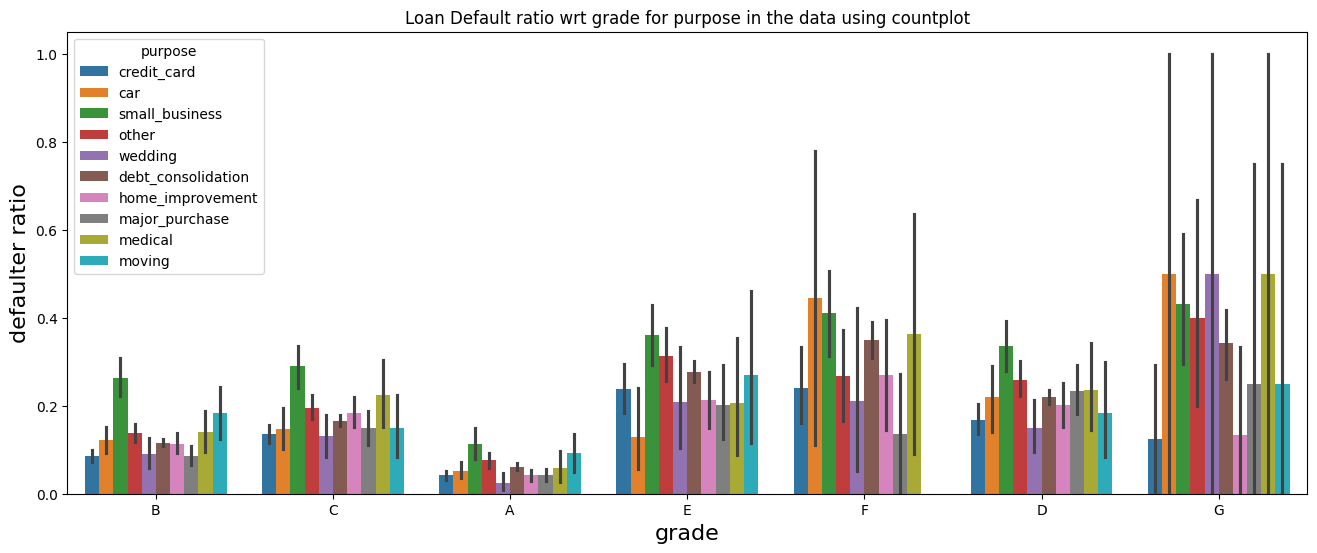

In [1089]:
# check for defaulters wrt grade and purpose in the data 
plotBivariateBar("grade", "purpose")

As we can see default ratio increases for every purpose wrt grade

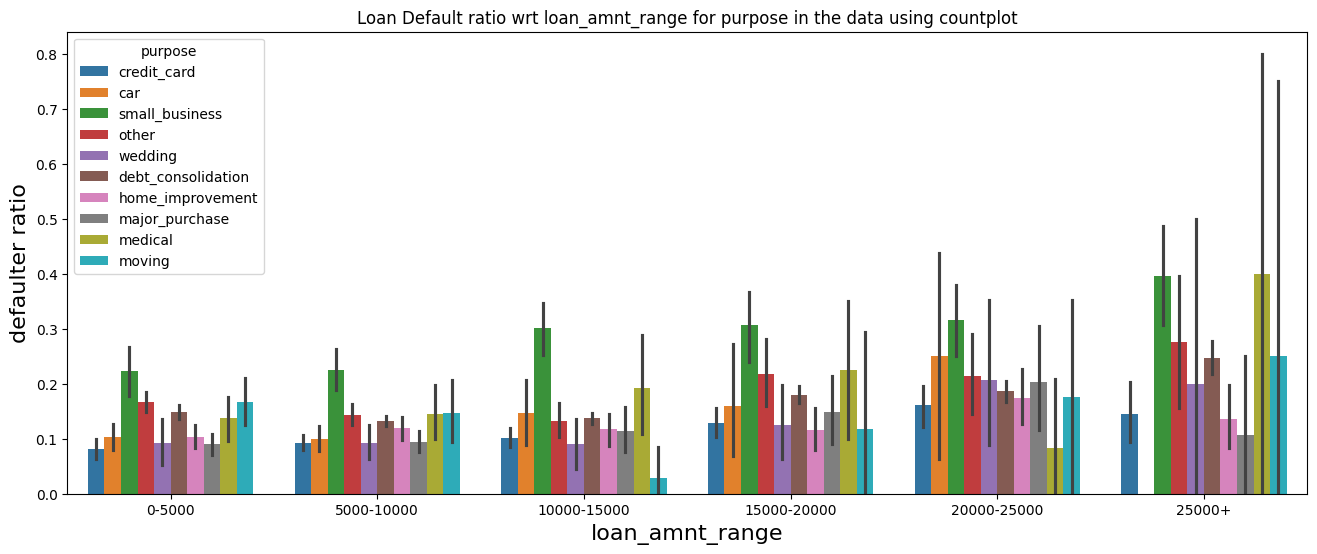

In [1090]:
# check for defaulters wrt loan_amnt_range and purpose in the data
plotBivariateBar("loan_amnt_range", "purpose")

As we can see default ratio increases for every purpose wrt loan_amnt_range

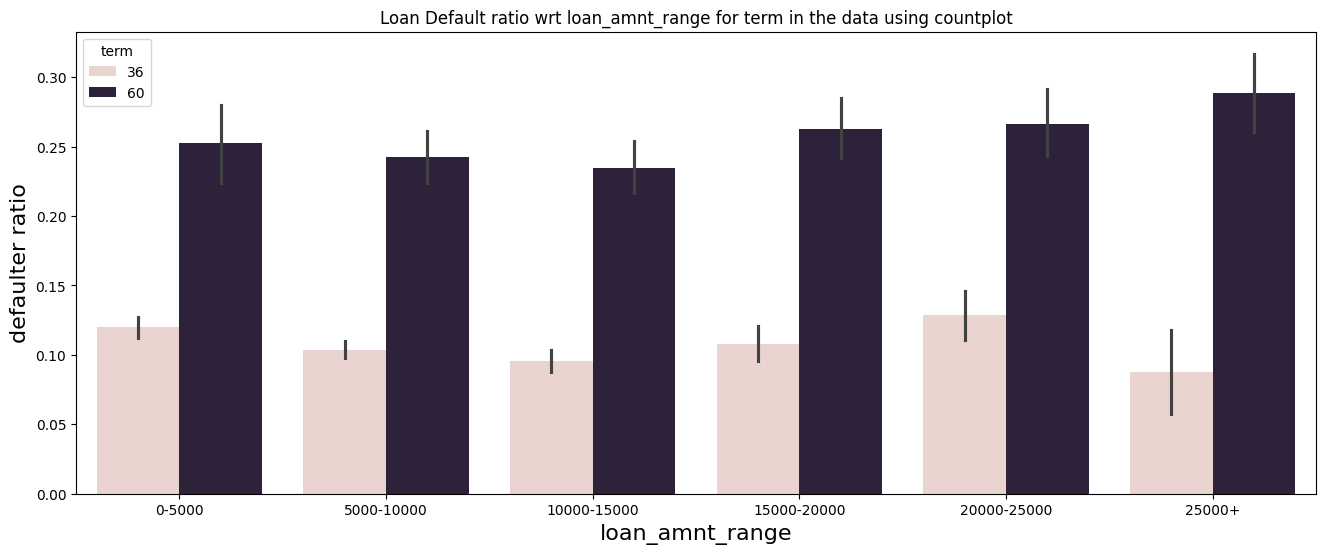

In [1091]:
# check for defaulters wrt loan_amnt_range and term in the data
plotBivariateBar("loan_amnt_range", "term")

As we can see as loan amount range increase then default ratio also increases for every term wrt loan_amnt_range

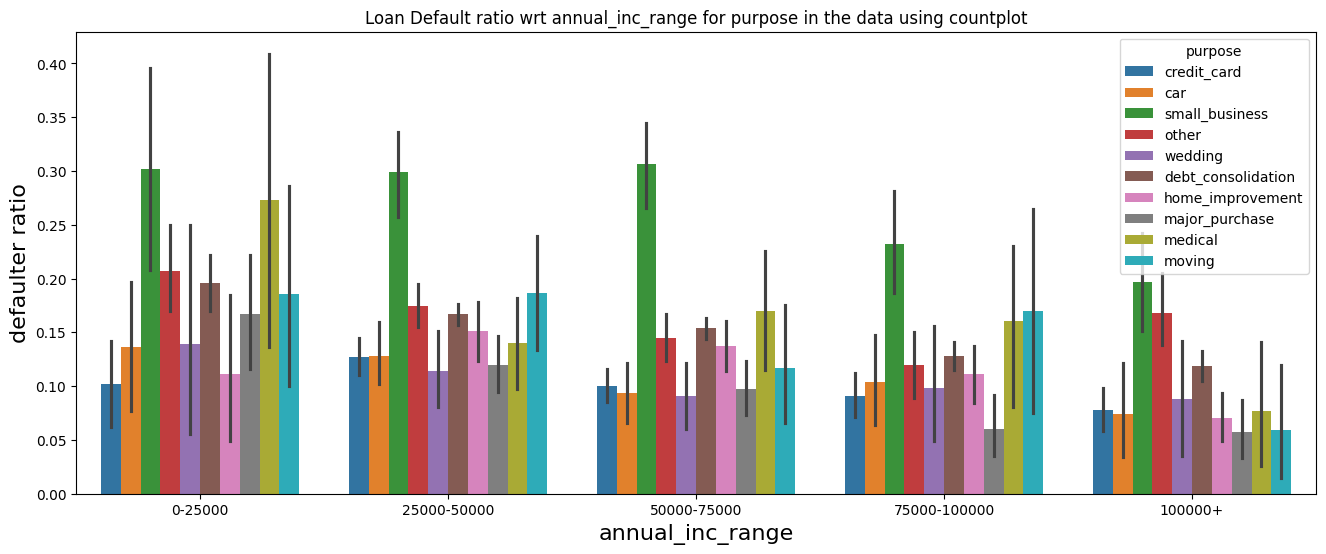

In [1092]:
# check for defaulters wrt annual_inc_range and purpose in the data
plotBivariateBar("annual_inc_range", "purpose")

As we can see default ratio increases for every purpose wrt annual_inc_range

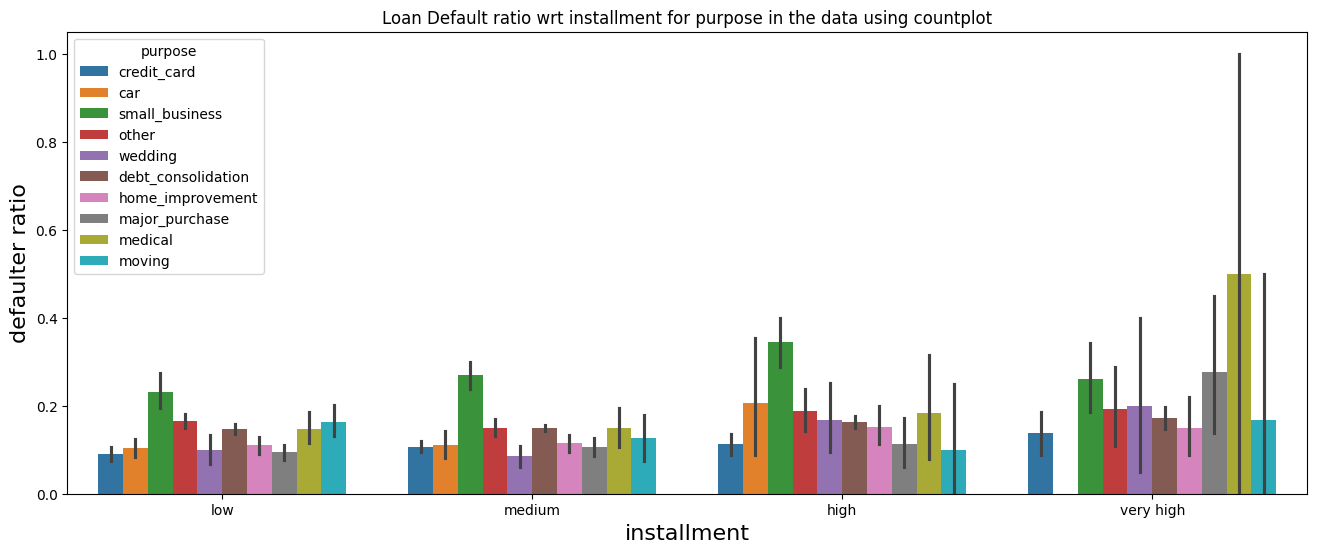

In [1093]:
# check for defaulters wrt installment and purpose in the data
plotBivariateBar("installment", "purpose")

As we can see  default ratio increases for every purpose wrt installment except for small_business

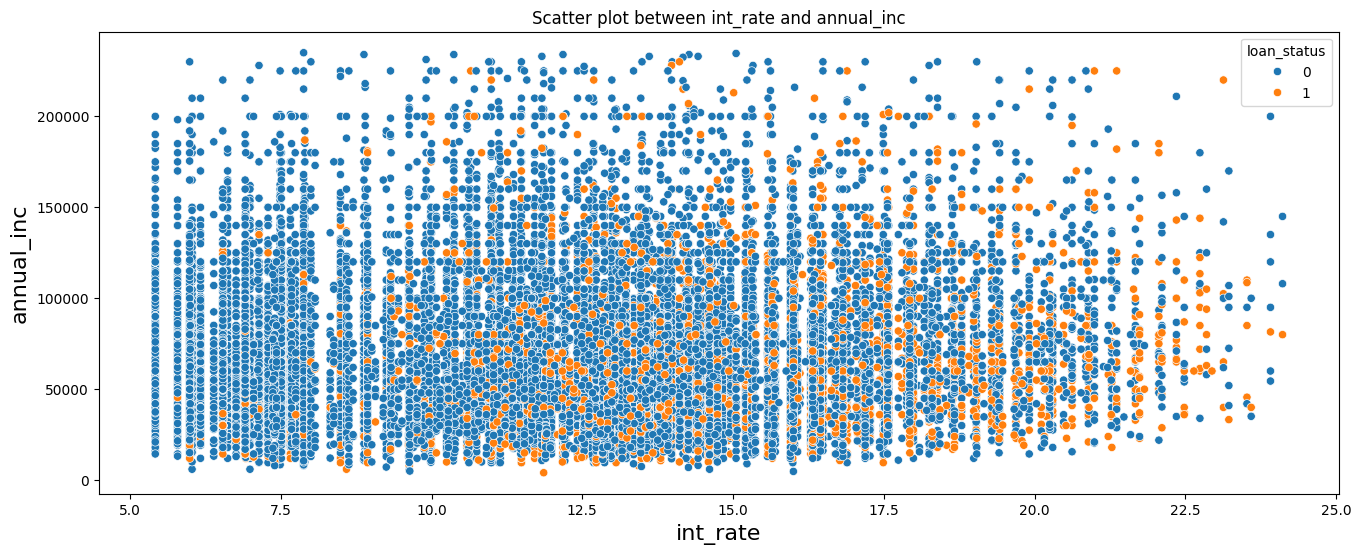

In [1094]:
# check for defaulters wrt int_rate and annual_inc in the data
plotScatter("int_rate", "annual_inc")

As we can see straight lines on the plot, there is no relation between above mentioned features

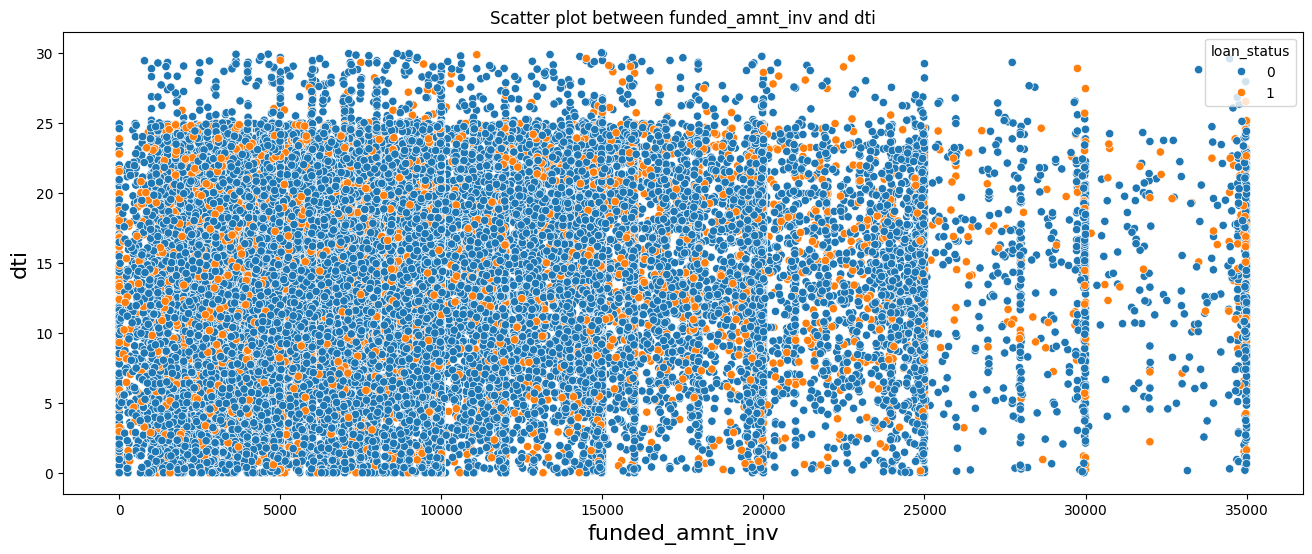

In [1095]:
# plot scatter for funded_amnt_inv with dti
plotScatter("funded_amnt_inv", "dti")

As we can see straight lines on the plot, there is no relation between above mentioned features

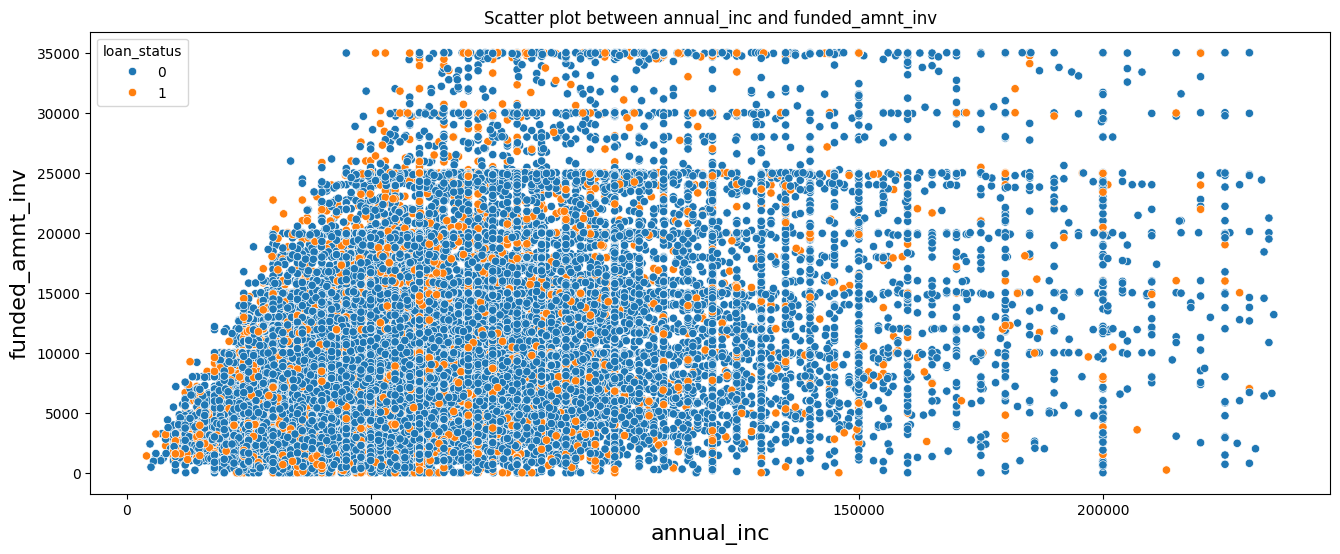

In [1096]:
# plot scatter for funded_amnt_inv with annual_inc
plotScatter("annual_inc", "funded_amnt_inv")

As we can see slope pattern on the plot, there is positive relation between above mentioned features

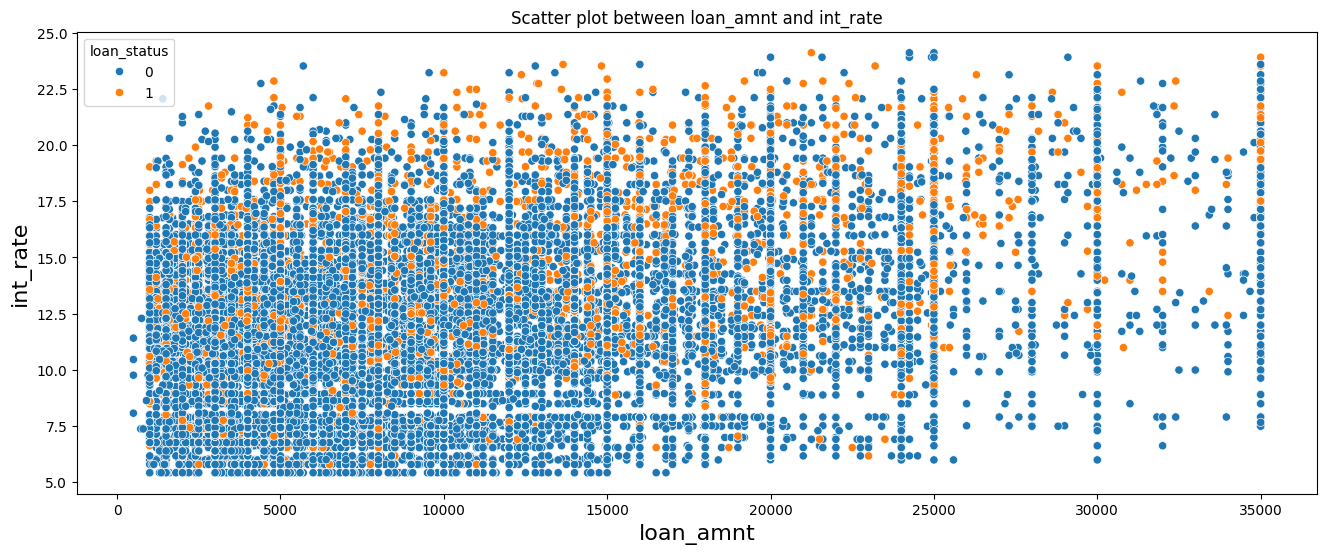

In [1097]:
# plot scatter for loan_amnt with int_rate
plotScatter("loan_amnt", "int_rate")

As we can see straight line patterns on the plot, there is no relation between above mentioned features

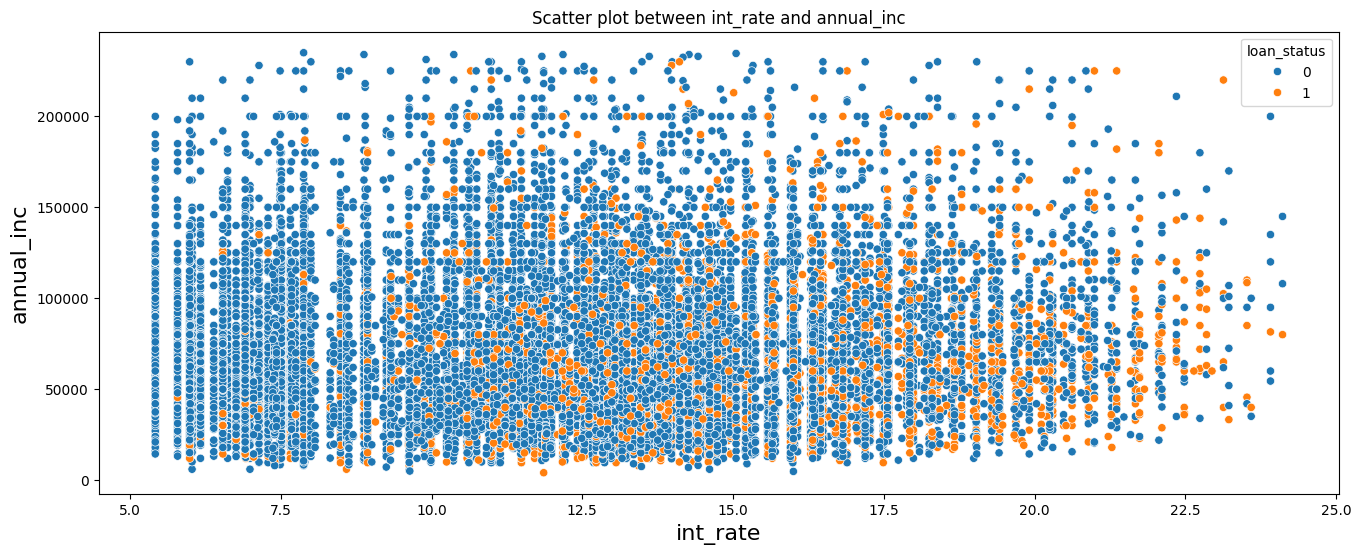

In [1098]:
# plot scatter for int_rate with annual_inc
plotScatter("int_rate", "annual_inc")

As we can see negative correlation pattern with reduced density on the plot, there is some relation between above mentioned features

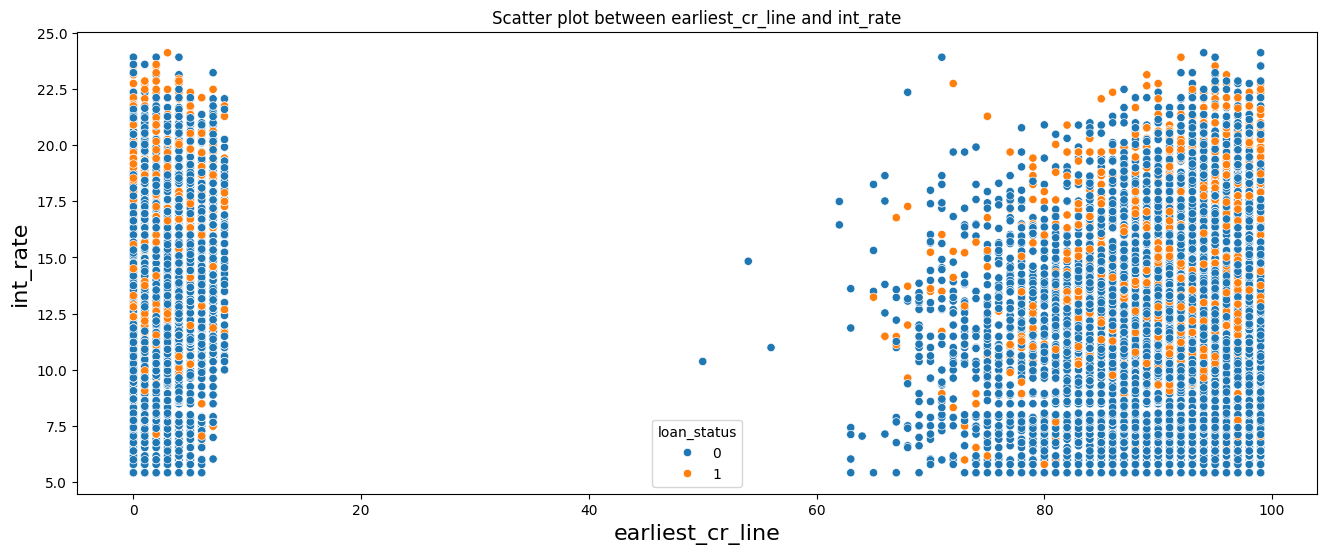

In [1099]:
# plot scatter for earliest_cr_line with int_rate
plotScatter("earliest_cr_line", "int_rate")

As we can see positive correlation pattern with increasing density on the plot, there is co-relation between above mentioned features

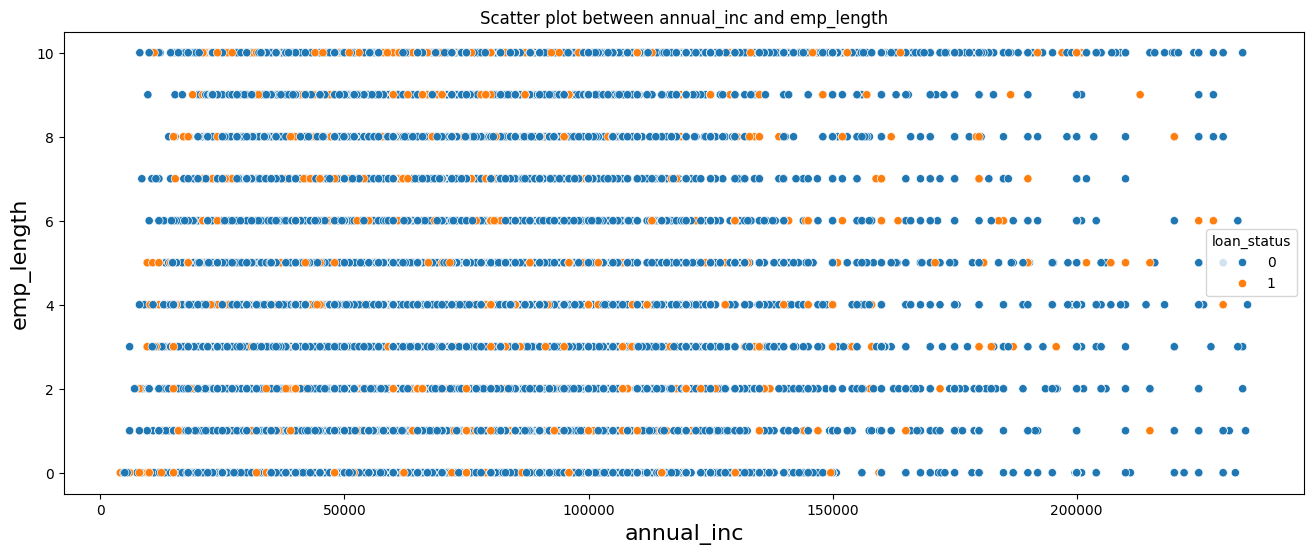

In [1100]:
# plot scatter for annual_inc with emp_length
plotScatter("annual_inc", "emp_length")

As we can see straight line patterns on the plot, there is no relation between above mentioned features

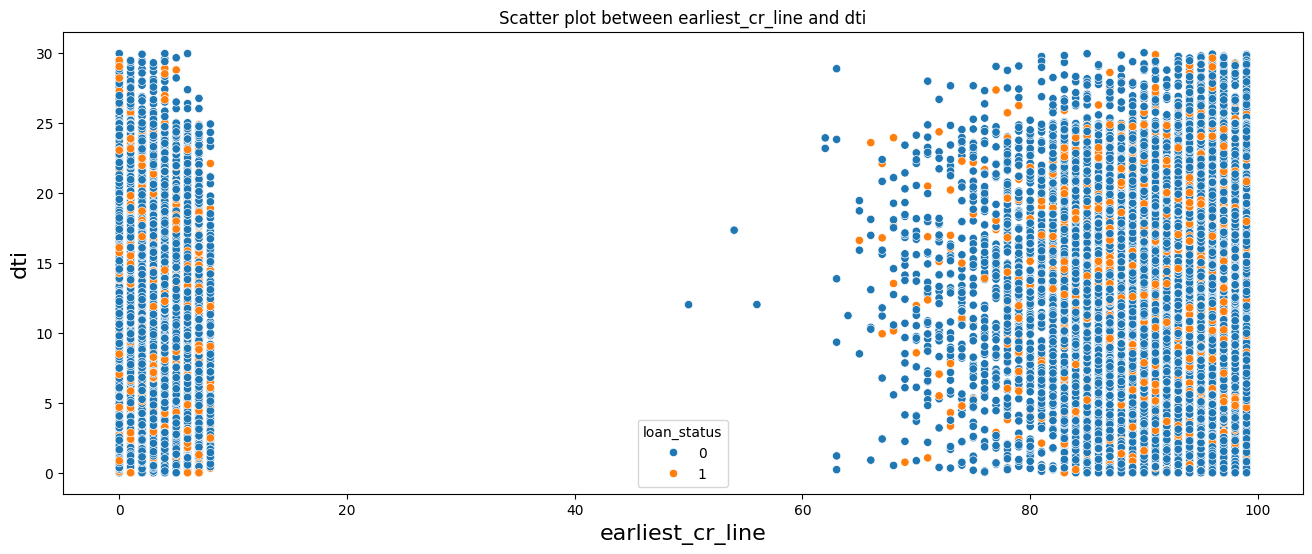

In [1101]:
# plot scatter for earliest_cr_line with dti
plotScatter("earliest_cr_line", "dti")

Plotting for two different features with respect to loan default ratio on y-axis with Box Plots.

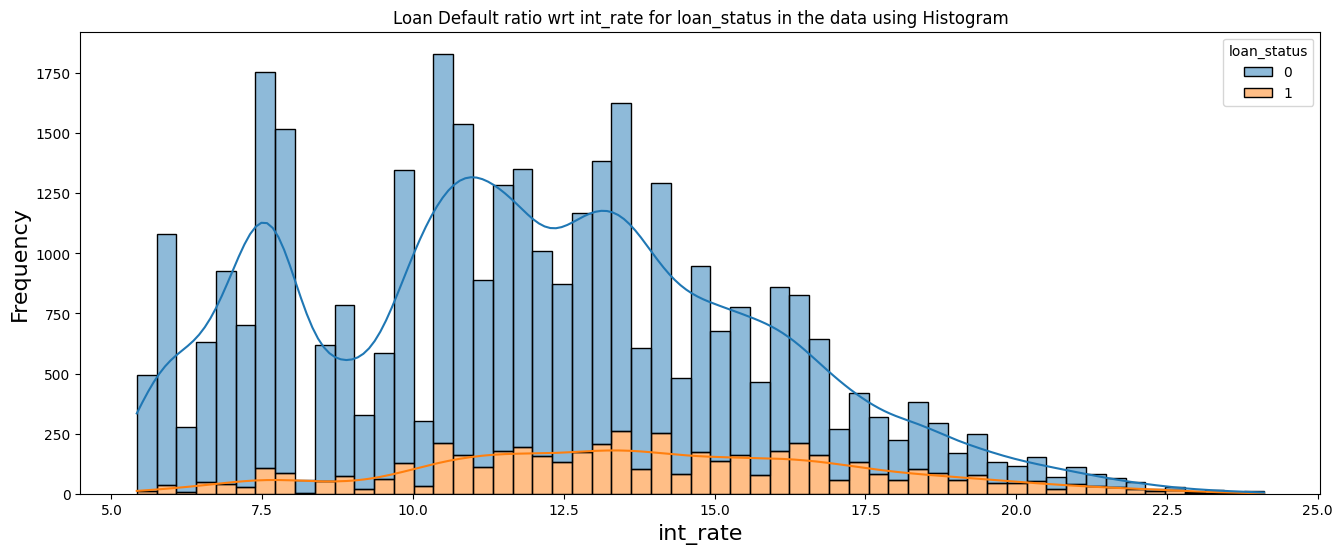

In [1102]:
plotBivariateHistogram("int_rate", "loan_status")

In [1103]:
# function to plot boxplot for comparing two features
def plotBox(x, y, hue="loan_status"):
    plt.figure(figsize=(16,6))
    sns.boxplot(x=x, y=y, data=loan, hue=hue, order=sorted(loan[x].unique()))
    plt.title("Box plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    plt.figure(figsize=(16,8))
    plt.show()

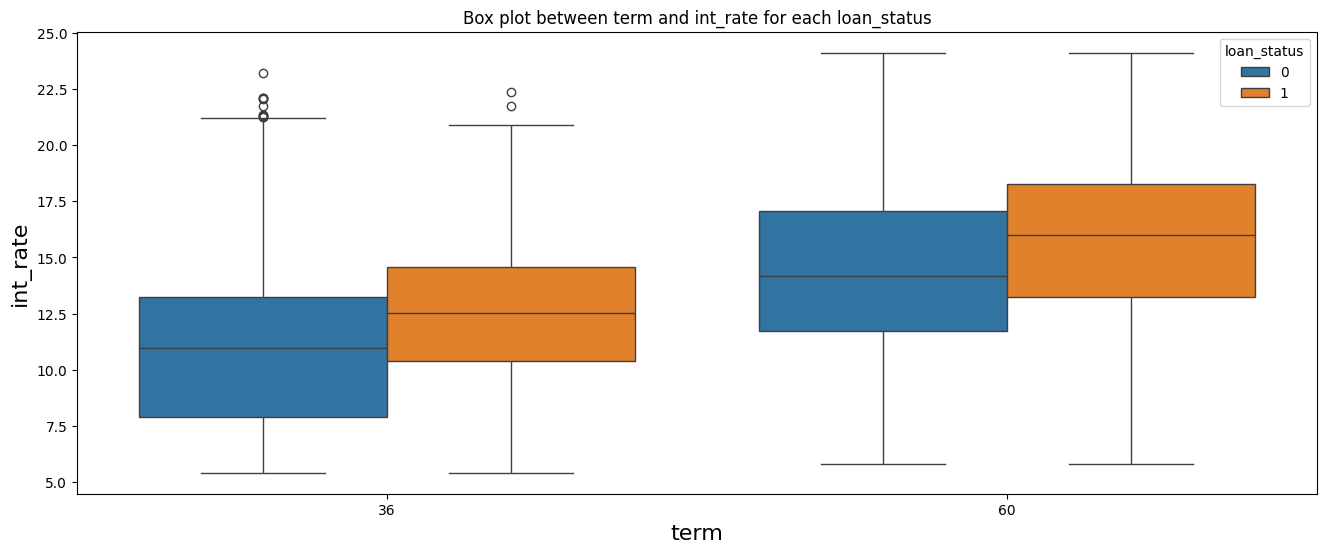

<Figure size 1600x800 with 0 Axes>

In [1104]:
# plot box for term vs int_rate for each loan_status
plotBox("term", "int_rate")

int_rate increases with term on loan and the chances of default also increases

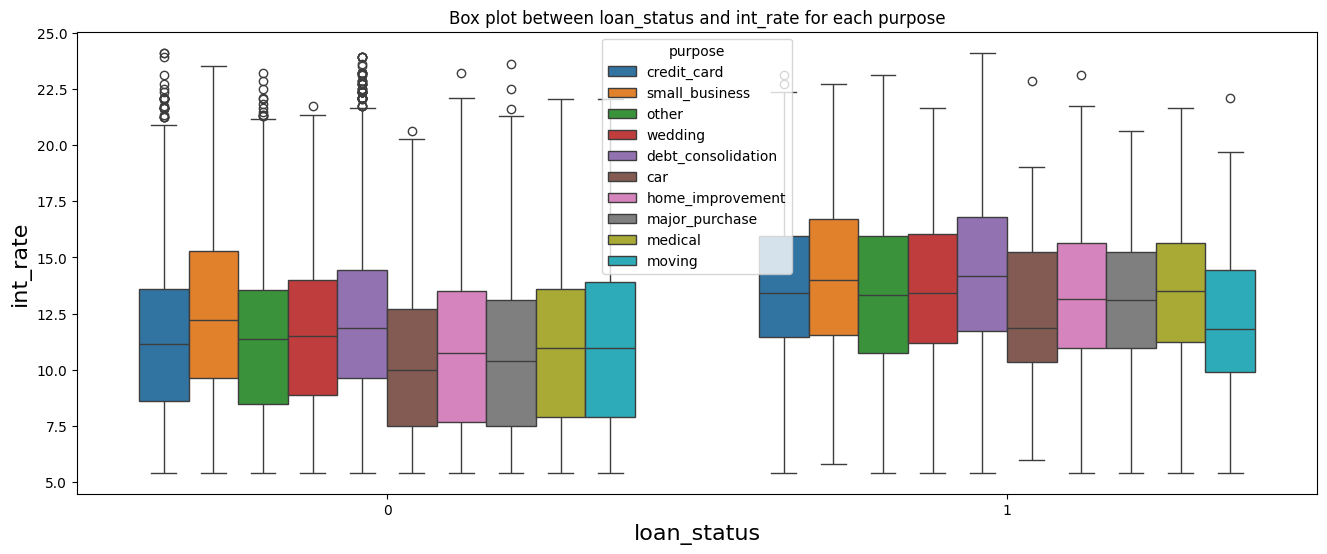

<Figure size 1600x800 with 0 Axes>

In [1105]:
# plot box for loan_status vs int_rate for each purpose
plotBox("loan_status", "int_rate", hue="purpose")

int_rate is quite high where the loan is defaulted for every purpose value

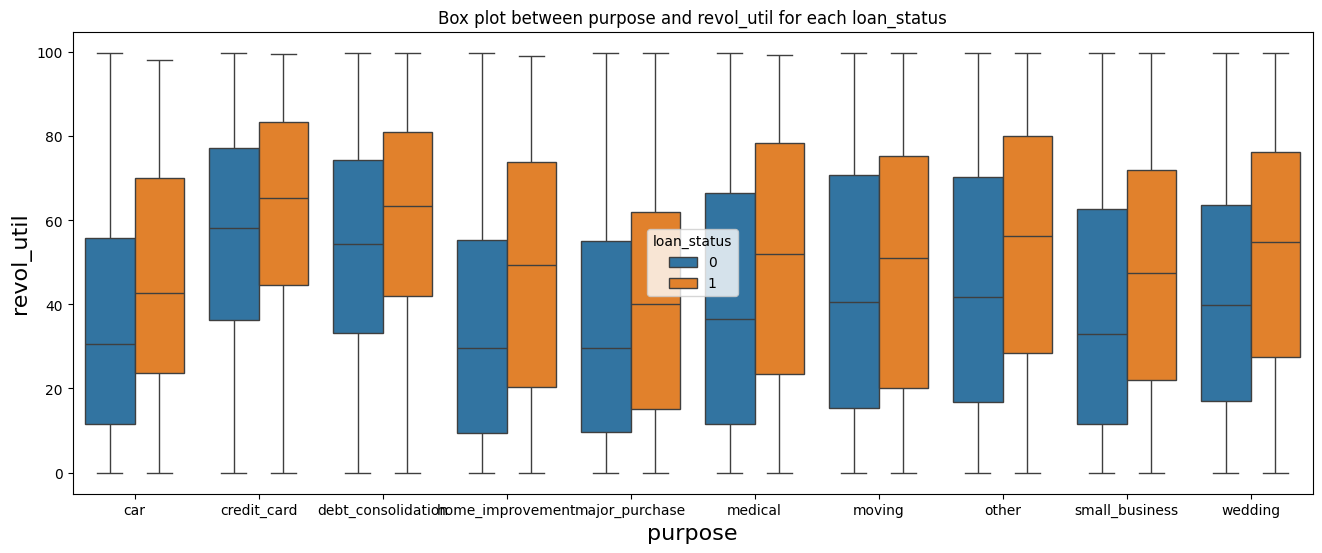

<Figure size 1600x800 with 0 Axes>

In [1106]:
# plot box for purpose vs revo_util for each status
plotBox("purpose", "revol_util")

revol_util is more for every purpose value where the loan is defaulted and quite high for credit_card

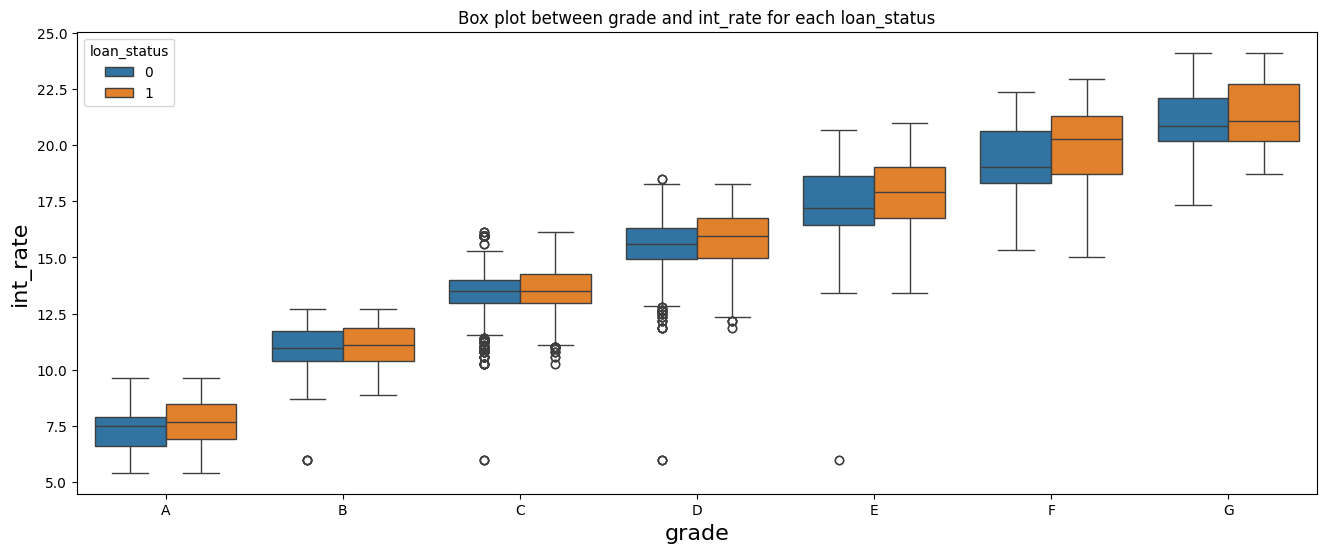

<Figure size 1600x800 with 0 Axes>

In [1107]:
# plot box for grade vs int_rate for each loan_status
plotBox("grade", "int_rate", "loan_status")

int_rate is increasing with every grade and also the defaulters for every grade are having their median near the non-defaulter 75% quantile of int_rate

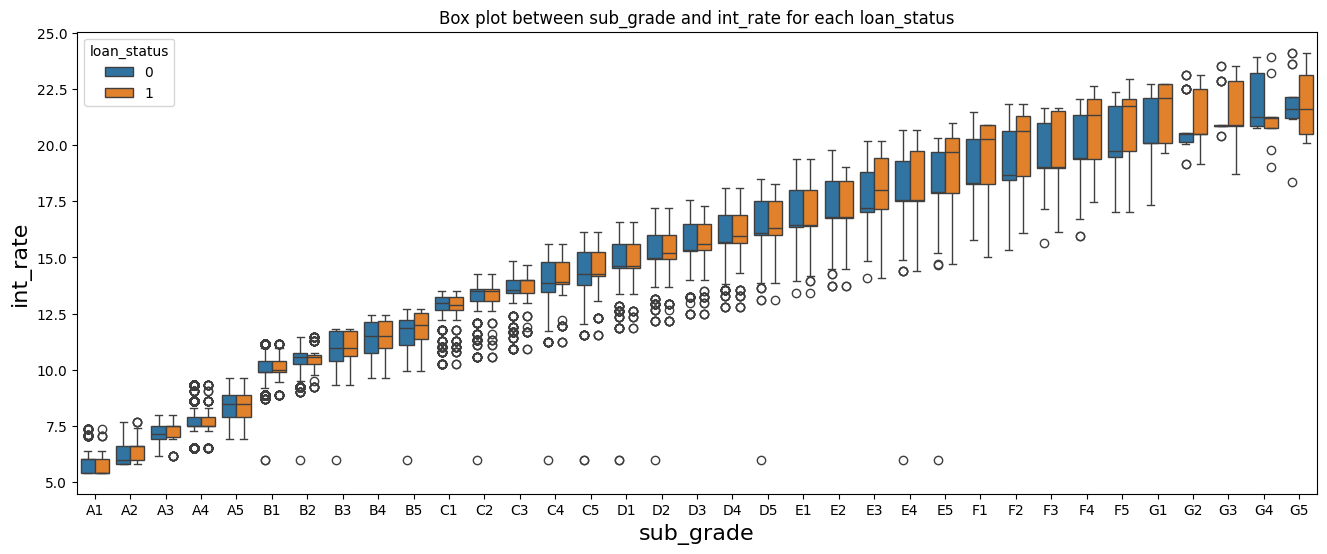

<Figure size 1600x800 with 0 Axes>

In [1108]:
# plot box for sub_grade vs int_rate for each loan_status
plotBox("sub_grade", "int_rate", "loan_status")

int_rate is increasing with every sub_grade thus increase likelihood of defaulters.

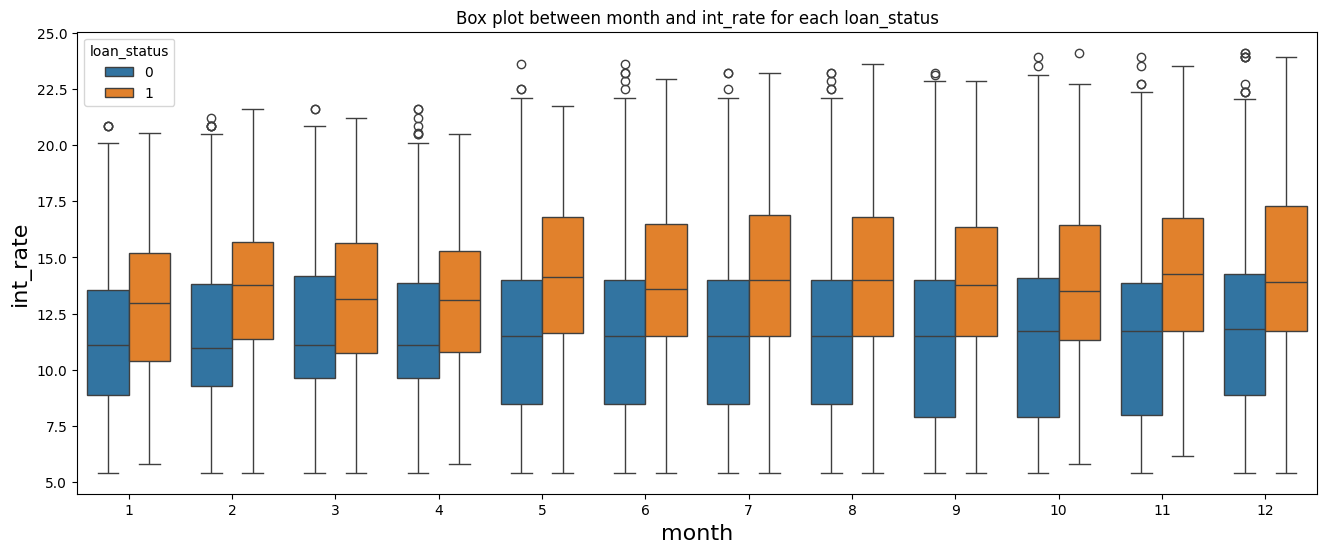

<Figure size 1600x800 with 0 Axes>

In [1109]:
# plot box for issue_d vs int_rate for each loan_status
plotBox("month", "int_rate")

int_rate for defaulter is increasing with every month where the defaulters for every month are having their median near the non-defaulter’s 75% quantile of int_rate, but is almost constant for each month, hence not useful

Therefore, following are the important feature we deduced from above Bivariate analysis:
<ul>
<li>term
<li>grade
<li>purpose
<li>pub_rec
<li>revol_util
<li>funded_amnt_inv
<li>int_rate
<li>annual_inc
<li>installment
</ul>

# Multivariate Analysis (Correlation)

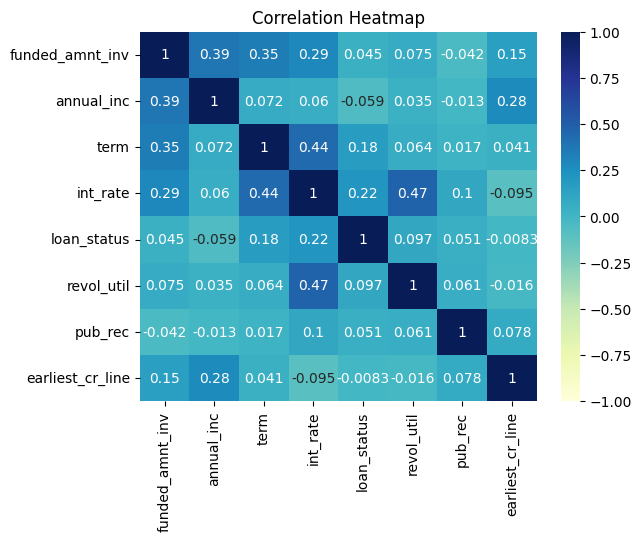

In [1110]:
# plot heat map to see correlation between features
continuous_f = ["funded_amnt_inv", "annual_inc", "term", "int_rate", "loan_status", "revol_util", "pub_rec", "earliest_cr_line"]
loan_corr = loan[continuous_f].corr()
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

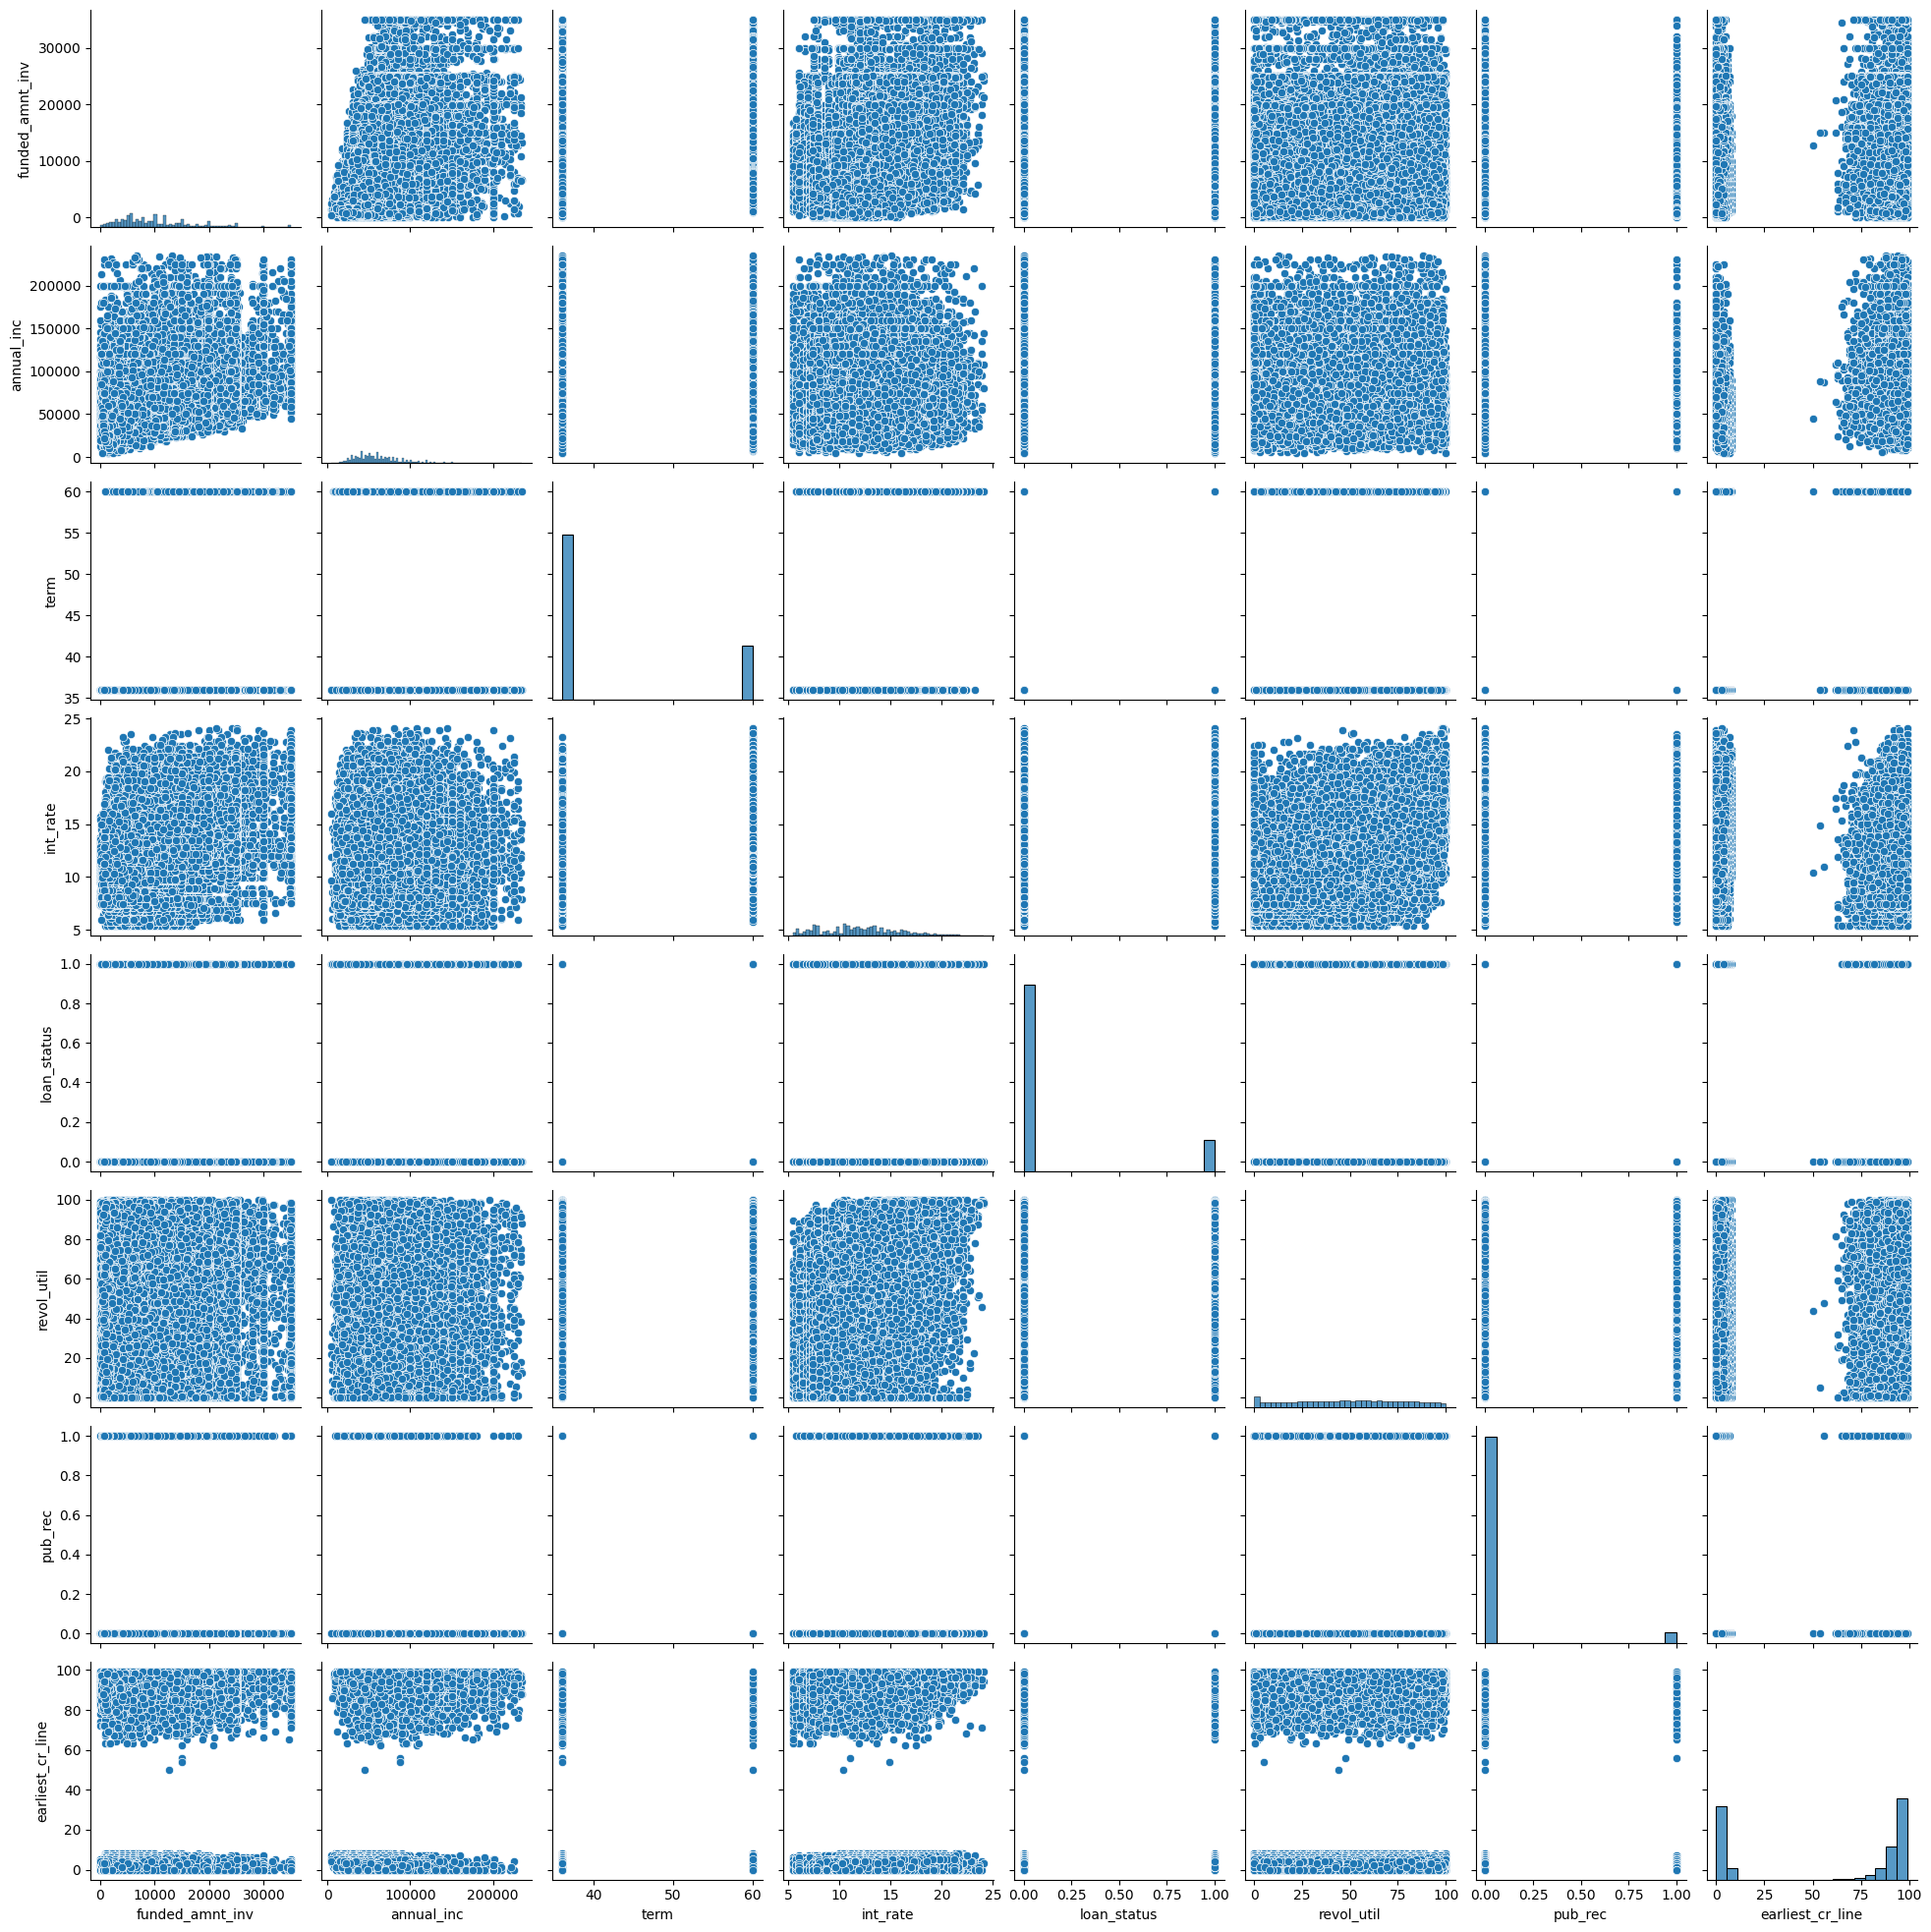

In [1111]:
# Create scatterplot matrix
sns.pairplot(loan[continuous_f])

Hence, important related feature from above Multivariate analysis are:

<ul>
<li>term
<li>grade
<li>purpose
<li>revol_util
<li>int_rate
<li>installment
<li>annual_inc
<li>funded_amnt_inv
</ul>

The best driving features for the Loan default analysis are: 
<ul>
<li>term
<li>grade
<li>purpose
<li>revol_util
<li>int_rate
<li>installment
<li>annual_inc
<li>funded_amnt_inv
</ul>